# ***Loan Credit Risk Analytics EDA Case study***

## Retrieving and Understanding data 

In [1]:
# Importing important libraries

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
# Setting display options

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',500)

In [3]:
# Loading the required datasets

# Loading the dataset related to Loan Applications

master_application_data = pd.read_csv("application_data.csv")

In [4]:
# Displaying the loaded dataset's head for quick glance

master_application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [5]:
# View the shape of the dataset

master_application_data.shape

(307511, 122)

In [6]:
# Let's understand the data types of all the columns and counts

master_application_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [7]:
# Let's view the statistical information from the columns those are already numeric

master_application_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

## Data Handling and Data Cleaning
- We will analyze the columns that are required for the analysis, according to the business objective.
- We will manage all the missing/null values that may be present in some of the columns.
- We will correct the data types of certain columns.

#### Extracting required columns
- Let's view the columns and their importance for the analysis.
- We will consider only those columns that are required to achieve the business objective.
- We will not consider all the extra informations for the analysis and to generate insights.

In [8]:
# We will create a copy of master dataset into another data set, and perform the required clening on that data to generate insights

application_data = master_application_data

In [9]:
# Let's view first 31 columns

application_data.iloc[:,:30].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  
0                 1           1           0        Laborers              1.0  
1                 1           1           0      Core staff              2.0  
2                 1           1           0        Laborers              1.0  
3                 1           0           0        Laborers              2.0  
4                 1           0           0      Core staff              1.0

#### Discarding below mentioned columns from analysis directly after studying their meaning and importance.
- Not considering below columns will not affect the analysis to the Target Varible based on the business objective.
    - NAME_TYPE_SUITE (Who accompanying the client while applying the loan may not affect Target Variable)
    - REGION_POPULATION_RELATIVE (Population where the client lives also can be ignored from the analysis)
    - DAYS_REGISTRATION (Days of changing the application may not affect Target)
    - DAYS_ID_PUBLISH (Similarly, days of changing the identity also can be ignored)
    - FLAG_MOBIL (Information about whether client has mobile or not can be ignored)
    - FLAG_EMP_PHONE (Similarly, whether the client has provided phone number or not can be ignored)
    - FLAG_WORK_PHONE (Whether the client has provided office phone number or not can also be ignored)
    - FLAG_CONT_MOBILE (Whether the mobile was rechable or not can also be ignored from analysis)
    - FLAG_PHONE (Client provided home phone or not can also be ignored)
    - FLAG_EMAIL (Information about the e-mail is also not required for analysis)

In [10]:
# Deleting the above mentioned columns
# del application_data['NAME_TYPE_SUITE']
# del application_data['REGION_POPULATION_RELATIVE']
# del application_data['DAYS_REGISTRATION']
# del application_data['DAYS_ID_PUBLISH']
application_data.drop(
    ['NAME_TYPE_SUITE','REGION_POPULATION_RELATIVE','DAYS_REGISTRATION','DAYS_ID_PUBLISH'],
    axis=1,inplace=True)
application_data.drop(
    application_data.loc[:,'FLAG_MOBIL':'FLAG_EMAIL'],
    axis = 1,inplace=True)

In [11]:
# Displaying the dataframe after performing the operation

application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  Single / not married  House / apartment       -9461           -637   
1               Married  House / apartment      -16765          -1188   
2  Single / not married  House / apartment      -19046           -225   
3        Civil marriage  House / apartment      -19005          -3039   
4  Single / not married  House / apartment      -19932          -3038   

   OWN_CAR_AGE OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0          NaN        Laborers              1.0                     2   
1          NaN      Core staff              2.0                     1   
2         26.0        Laborers              1.0                     2   
3          NaN        Laborers              2.0                     2   
4          NaN      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

        ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0  Business Entity Type 3      0.083037      0.262949      0.139376   
1                  School      0.311267      0.622246           NaN   
2              Government           NaN      0.55

In [12]:
# Displaying the number of rows and columns

application_data.shape

(307511, 112)

In [13]:
# Let's analyze the remaining rows and their necessity for the analysis.

application_data.loc[:,'WEEKDAY_APPR_PROCESS_START':].head()

WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0              Government   
3                       0                        0  Business Entity Type 3   
4                       1                        1                Religion   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  \
0      0.083037      0.262949      0.139376          0.0247            0.0369   
1      0.311267      0.622246           NaN          0.0959            0.0529   
2           NaN      0.555912      0.729567             NaN               NaN   
3           NaN      0.650442           NaN             NaN               NaN   
4           NaN      0.322738           NaN             NaN               NaN   

   YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  \
0                       0.9722           0.6192          0.0143   
1                       0.9851           0.7960          0.0605   
2                          NaN              NaN             NaN   
3                          NaN              NaN             NaN   
4                          NaN              NaN             NaN   

   ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
0           0.00         0.0690         0.0833         0.1250        0.0369   
1           0.08         0.0345         0.2917         0.3333        0.0130   
2            NaN            NaN            NaN            NaN           NaN   
3            NaN            NaN            NaN            NaN           NaN   
4            NaN            NaN            NaN            NaN           NaN   

   LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  \
0                0.0202          0.0190                   0.0000   
1                0.0773          0.0549                   0.0039   
2                   NaN             NaN                      NaN   
3                   NaN             NaN                      NaN   
4                   NaN             NaN                      NaN   

   NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  \
0             0.0000           0.0252             0.0383   
1             0.0098           0.0924             0.0538   
2                NaN              NaN                NaN   
3                NaN              NaN                NaN   
4                NaN              NaN                NaN   

   YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  \
0                        0.9722            0.6341           0.0144   
1                        0.9851            0.8040           0.0497   
2                           NaN               NaN              NaN   
3                           NaN               NaN          

- This dataframe have a lot of non-required and non-essential columns and not considering those may not affect our analysis to achieve the business objective.
- After having glance through the columns, information about the address is not required for analysis and can be ignored from generating their insights.
- Only ORGANIZATION_TYPE can be required amongst all the above columns, hence we will extract only that column for further analysis, and ignore all other columns directly.

In [14]:
# Dropping non-essential columns from the data

application_data.drop(application_data.loc[:,'REGION_RATING_CLIENT':'LIVE_CITY_NOT_WORK_CITY'],axis = 1,inplace=True)
application_data.drop(application_data.loc[:,'EXT_SOURCE_1':],axis = 1,inplace=True)

In [15]:
# Displaying the result after dropping the columns

application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  Single / not married  House / apartment       -9461           -637   
1               Married  House / apartment      -16765          -1188   
2  Single / not married  House / apartment      -19046           -225   
3        Civil marriage  House / apartment      -19005          -3039   
4  Single / not married  House / apartment      -19932          -3038   

   OWN_CAR_AGE OCCUPATION_TYPE  CNT_FAM_MEMBERS       ORGANIZATION_TYPE  
0          NaN        Laborers              1.0  Business Entity Type 3  
1          NaN      Core staff              2.0                  School  
2         26.0        Laborers              1.0              Government  
3          NaN        Laborers              2.0  Business Entity Type 3  
4          NaN      Core staff              1.0                Religion

In [16]:
# Analyze final shape of the dataframe after operations.

application_data.shape

(307511, 21)

In [17]:
# Displaying the info again so that we can get the information about data types and non-null values.

application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           307511 non-null  int64  
 1   TARGET               307511 non-null  int64  
 2   NAME_CONTRACT_TYPE   307511 non-null  object 
 3   CODE_GENDER          307511 non-null  object 
 4   FLAG_OWN_CAR         307511 non-null  object 
 5   FLAG_OWN_REALTY      307511 non-null  object 
 6   CNT_CHILDREN         307511 non-null  int64  
 7   AMT_INCOME_TOTAL     307511 non-null  float64
 8   AMT_CREDIT           307511 non-null  float64
 9   AMT_ANNUITY          307499 non-null  float64
 10  AMT_GOODS_PRICE      307233 non-null  float64
 11  NAME_INCOME_TYPE     307511 non-null  object 
 12  NAME_EDUCATION_TYPE  307511 non-null  object 
 13  NAME_FAMILY_STATUS   307511 non-null  object 
 14  NAME_HOUSING_TYPE    307511 non-null  object 
 15  DAYS_BIRTH       

- Now, we have information about columns that can be considered for analysis and may be helpful in generating insights. Now we are going to analyze each and every column for null checks and missing values. We can then perform sanity checks also if required.

In [18]:
# Let's analyze the percentage of null values present in all the columns.

application_data.isnull().sum()/application_data.shape[0]*100

SK_ID_CURR              0.000000
TARGET                  0.000000
NAME_CONTRACT_TYPE      0.000000
CODE_GENDER             0.000000
FLAG_OWN_CAR            0.000000
FLAG_OWN_REALTY         0.000000
CNT_CHILDREN            0.000000
AMT_INCOME_TOTAL        0.000000
AMT_CREDIT              0.000000
AMT_ANNUITY             0.003902
AMT_GOODS_PRICE         0.090403
NAME_INCOME_TYPE        0.000000
NAME_EDUCATION_TYPE     0.000000
NAME_FAMILY_STATUS      0.000000
NAME_HOUSING_TYPE       0.000000
DAYS_BIRTH              0.000000
DAYS_EMPLOYED           0.000000
OWN_CAR_AGE            65.990810
OCCUPATION_TYPE        31.345545
CNT_FAM_MEMBERS         0.000650
ORGANIZATION_TYPE       0.000000
dtype: float64

In [19]:
# As 66% data is missing in the OWN_CAR_AGE column, so we will discard the column from analysis

application_data.drop(columns=['OWN_CAR_AGE'],axis = 1,inplace=True)

- As approximately 30% of the data is missing in OCCUPATION_TYPE column, then we can ignore the column from further analysis.

In [20]:
# Dropping the column OCCUPATION_TYPE

application_data.drop(['OCCUPATION_TYPE'], inplace=True, axis=1)

In [21]:
# Let's analyse the AMT_ANNUITY column for the missing values.

application_data[application_data.AMT_ANNUITY.isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
47531       155054       0         Cash loans           M            N   
50035       157917       0         Cash loans           F            N   
51594       159744       0         Cash loans           F            N   
55025       163757       0         Cash loans           F            N   
59934       169487       0         Cash loans           M            Y   
75873       187985       0         Cash loans           M            Y   
89343       203726       0         Cash loans           F            Y   
123872      243648       0         Cash loans           F            N   
207186      340147       0         Cash loans           M            N   
227939      364022       0         Cash loans           F            N   
239329      377174       0         Cash loans           F            N   
241835      379997       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
47531                N             0          180000.0    450000.0   
50035                N             0           94500.0    450000.0   
51594                N             0          202500.0    539100.0   
55025                N             0          162000.0    296280.0   
59934                N             0          202500.0    360000.0   
75873                N             0          144000.0    219249.0   
89343                N             0           90000.0    157500.0   
123872               Y             0          202500.0    929088.0   
207186               N             0          171000.0    486000.0   
227939               Y             0          315000.0    628069.5   
239329               Y             0          157500.0    792000.0   
241835               N             0          315000.0   1483231.5   

        AMT_ANNUITY  AMT_GOODS_PRICE      NAME_INCOME_TYPE  \
47531           NaN         450000.0  Commercial associate   
50035           NaN         450000.0               Working   
51594           NaN         450000.0               Working   
55025           NaN         225000.0         State servant   
59934           NaN         360000.0               Working   
75873           NaN         166500.0               Working   
89343           NaN         157500.0         State servant   
123872          NaN         720000.0               Working   
207186          NaN         486000.0  Commercial associate   
227939          NaN         499500.0  Commercial associate   
239329          NaN         792000.0         State servant   
241835          NaN        1354500.0               Working   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
47531               Incomplete higher  Single / not married   
50035                 Lower secondary        Civil marriage   
51594   Secondary / secondary special               Married   
55025                Higher education               Married   
59934   Secondary / secondary special  Single / not married   
75873                Higher education  Single / not married   
89343   Secondary / secondary special               Married   
123872  Secondary / secondary special        Civil marriage   
207186               Higher education               Married   
227939               Higher education               Married   
239329  Secondary / secondary special               Married   
241835               Higher education               Married   

          NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  CNT_FAM_MEMBERS  \
47531     House / apartment      -10668          -2523              1.0   
50035     House / apartment       -9027          -1270              2.0   
51594     House / apartment      -17376          -3950              2.0   
55025     House / apartment      -11329          -2040              2.0   
59934     House / apartment      -19762          -2498              1.0   
75873      Rented apartment      -20831          -2450   

- We can remove those values from the data, as guessing the amount or replacing it with any other value is not feasible.

In [22]:
# Assigning the missing null values in the AMT_ANNUITY column with the median value of the column.

application_data = application_data[~application_data.AMT_ANNUITY.isnull()]

In [23]:
# Let's find the null values in appapplication_data once again. 

application_data.isnull().sum()

SK_ID_CURR               0
TARGET                   0
NAME_CONTRACT_TYPE       0
CODE_GENDER              0
FLAG_OWN_CAR             0
FLAG_OWN_REALTY          0
CNT_CHILDREN             0
AMT_INCOME_TOTAL         0
AMT_CREDIT               0
AMT_ANNUITY              0
AMT_GOODS_PRICE        278
NAME_INCOME_TYPE         0
NAME_EDUCATION_TYPE      0
NAME_FAMILY_STATUS       0
NAME_HOUSING_TYPE        0
DAYS_BIRTH               0
DAYS_EMPLOYED            0
CNT_FAM_MEMBERS          2
ORGANIZATION_TYPE        0
dtype: int64

In [24]:
# Let's consider CNT_FAM_MEMBERS

application_data[application_data.CNT_FAM_MEMBERS.isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
41982       148605       0    Revolving loans           M            N   
187348      317181       0    Revolving loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
41982                Y             0          450000.0    675000.0   
187348               Y             0          202500.0    585000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE      NAME_INCOME_TYPE  \
41982       33750.0              NaN  Commercial associate   
187348      29250.0              NaN  Commercial associate   

       NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
41982      Lower secondary            Unknown  Municipal apartment   
187348    Higher education            Unknown    House / apartment   

        DAYS_BIRTH  DAYS_EMPLOYED  CNT_FAM_MEMBERS       ORGANIZATION_TYPE  
41982       -12396          -1161              NaN               Insurance  
187348      -12844           -232              NaN  Business Entity Type 2

In [25]:
# Assigning the count of family members is not logically suitable.
# So we will remove these entries from the data.

application_data = application_data[~application_data.CNT_FAM_MEMBERS.isnull()]

In [26]:
# Now let's consider AMT_GOODS_PRICE, let's analyze the missing values
# Calculating the percentage of missing data in AMT_GOODS_PRICE.

(application_data.AMT_GOODS_PRICE.isnull().sum()/application_data.shape[0])*100

0.0897569732387633

In [27]:
# The missing percentage is very less, that means we have to deal with the missing values and take some decision accordingly
# Let's view the missing data

application_data[application_data.AMT_GOODS_PRICE.isnull()].head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
724       100837       0    Revolving loans           F            N   
5937      106955       0    Revolving loans           F            N   
6425      107494       0    Revolving loans           F            N   
6703      107822       0    Revolving loans           F            N   
7647      108913       0    Revolving loans           M            N   

     FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
724                Y             2           45000.0    135000.0       6750.0   
5937               N             0          157500.0    450000.0      22500.0   
6425               N             0           67500.0    202500.0      10125.0   
6703               N             1          121500.0    180000.0       9000.0   
7647               Y             0          180000.0    450000.0      22500.0   

      AMT_GOODS_PRICE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
724               NaN  Commercial associate  Secondary / secondary special   
5937              NaN               Working  Secondary / secondary special   
6425              NaN               Working               Higher education   
6703              NaN               Working  Secondary / secondary special   
7647              NaN               Working               Higher education   

        NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
724                Married  House / apartment      -10072           -381   
5937               Married  House / apartment      -11993          -2921   
6425               Married  House / apartment       -9727          -2712   
6703        Civil marriage  House / apartment      -11079           -899   
7647  Single / not married  House / apartment       -9986          -1847   

      CNT_FAM_MEMBERS       ORGANIZATION_TYPE  
724               4.0            Kindergarten  
5937              2.0  Business Entity Type 3  
6425              2.0           Trade: type 7  
6703              3.0              Government  
7647              1.0            Construction

In [28]:
# Let's remove the null values from  the analysis, as guessing the amount or replacing the values is not feaasible or correct appraoch.
# Removing the null values

application_data = application_data[~application_data.AMT_GOODS_PRICE.isnull()]

In [29]:
# Now let's check the null count of values in the dataframe once again.

application_data.isnull().sum()

SK_ID_CURR             0
TARGET                 0
NAME_CONTRACT_TYPE     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_ANNUITY            0
AMT_GOODS_PRICE        0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
CNT_FAM_MEMBERS        0
ORGANIZATION_TYPE      0
dtype: int64

In [30]:
# Let's view the data in the application_data.

application_data.sample(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
166505      293032       0         Cash loans           M            Y   
302466      450423       0         Cash loans           F            N   
76836       189101       0         Cash loans           F            N   
41258       147768       0         Cash loans           F            N   
203514      335938       0         Cash loans           M            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
166505               Y             2          135000.0    284400.0   
302466               Y             0          225000.0    675000.0   
76836                N             0          103500.0    495000.0   
41258                N             0          112500.0    143910.0   
203514               Y             1          135000.0    254700.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_INCOME_TYPE  \
166505      22599.0         225000.0          Working   
302466      26901.0         675000.0        Pensioner   
76836       15138.0         495000.0        Pensioner   
41258       14148.0         135000.0          Working   
203514      16713.0         225000.0          Working   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
166505               Higher education               Married   
302466  Secondary / secondary special               Married   
76836   Secondary / secondary special  Single / not married   
41258                Higher education  Single / not married   
203514  Secondary / secondary special               Married   

        NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  CNT_FAM_MEMBERS  \
166505  House / apartment      -15350          -6493              4.0   
302466  House / apartment      -22355         365243              2.0   
76836   House / apartment      -21388         365243              1.0   
41258   House / apartment      -22445         -13576              1.0   
203514  House / apartment      -10366           -905              3.0   

       ORGANIZATION_TYPE  
166505          Military  
302466               XNA  
76836                XNA  
41258         University  
203514     Self-employed

In [31]:
# Just an observation, we can see some XNA values in the ORGANIZATION_TYPE column.
# Let's view the data spread in ORGANIZATION_TYPE column.

application_data.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67930
XNA                       55352
Self-employed             38357
Other                     16667
Medicine                  11181
Business Entity Type 2    10542
Government                10390
School                     8883
Trade: type 7              7826
Kindergarten               6872
Construction               6714
Business Entity Type 1     5981
Transport: type 4          5392
Trade: type 3              3489
Industry: type 9           3367
Industry: type 3           3276
Security                   3241
Housing                    2953
Industry: type 11          2703
Military                   2630
Bank                       2505
Agriculture                2451
Police                     2337
Transport: type 2          2203
Postal                     2154
Security Ministries        1972
Trade: type 2              1892
Restaurant                 1807
Services                   1573
University                 1326
Industry: type 7           1307
Transpor

- Oops!, there are many XNA values in the ORGANIZATION_TYPE column.
- May be those are missing values where the missing value identifier is XNA. XNA/XAP denote NAN in some cases.

In [32]:
# Checking the percentage of the XNA values in ORGANIZATION_TYPE.

application_data[application_data.ORGANIZATION_TYPE == 'XNA'].shape[0]/application_data.shape[0]*100

18.016997535975733

- Analyzing the type of data present in the ORGANIZATION_TYPE column, there is one special organization type as 'Other'.
- So we can place the XNA category in 'Other' category.

In [33]:
# Replace the XNA value with 'Other'

application_data.ORGANIZATION_TYPE = application_data.ORGANIZATION_TYPE.fillna('Other')
def club_types(rtype):
    if 'Type' in rtype:
        return rtype.split()[0] + ' ' + rtype.split()[1]
    elif 'type' in rtype:
        return rtype.split(':')[0]
    elif 'XNA' in rtype:
        return 'Other'
    else:
        return rtype
application_data.ORGANIZATION_TYPE = application_data.ORGANIZATION_TYPE.apply(club_types)
application_data.ORGANIZATION_TYPE.value_counts(normalize=True)*100

Business Entity        27.489332
Other                  23.442082
Self-employed          12.485149
Industry                4.656583
Trade                   4.654304
Medicine                3.639400
Government              3.381930
Transport               2.923303
School                  2.891404
Kindergarten            2.236826
Construction            2.185397
Security                1.054941
Housing                 0.961197
Military                0.856061
Bank                    0.815374
Agriculture             0.797797
Police                  0.760690
Postal                  0.701124
Security Ministries     0.641883
Restaurant              0.588176
Services                0.512009
University              0.431611
Hotel                   0.314432
Electricity             0.308898
Insurance               0.193997
Telecom                 0.187487
Emergency               0.182279
Advertising             0.139639
Realtor                 0.128897
Culture                 0.123038
Mobile    

In [34]:
# Inspect the final result set for null/missing values.

application_data.isnull().sum()

SK_ID_CURR             0
TARGET                 0
NAME_CONTRACT_TYPE     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_ANNUITY            0
AMT_GOODS_PRICE        0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
CNT_FAM_MEMBERS        0
ORGANIZATION_TYPE      0
dtype: int64

## Handling Outliers and analysis of the data spread in all columns
- We will analyze the data spread in the columns and then dwill take decision about handling outliers.
- Also, we will reduce the data in the suitable format for analysis.

In [35]:
#Displaying the application data 

application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  Single / not married  House / apartment       -9461           -637   
1               Married  House / apartment      -16765          -1188   
2  Single / not married  House / apartment      -19046           -225   
3        Civil marriage  House / apartment      -19005          -3039   
4  Single / not married  House / apartment      -19932          -3038   

   CNT_FAM_MEMBERS ORGANIZATION_TYPE  
0              1.0   Business Entity  
1              2.0            School  
2              1.0        Government  
3              2.0   Business Entity  
4              1.0          Religion

In [36]:
#Let's analyze the important columns where outliers might be observed.
#Let's consider AMT_INCOME_TOTAL first.

application_data.AMT_INCOME_TOTAL.describe()

count    3.072210e+05
mean     1.688326e+05
std      2.372199e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.485000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

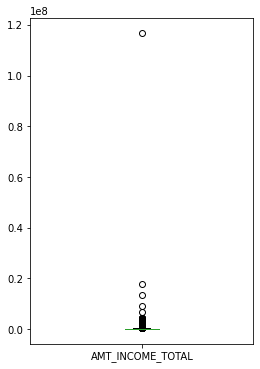

In [37]:
#Let's plot a box plot for this column

plt.figure(figsize=[4,6])
application_data.AMT_INCOME_TOTAL.plot.box()
plt.show()

- Clearly we can see one outlier where the income is more than 100 million
- We can delete this entry because, it may affect the overall statistics matrics for the column as well as it might not be required to consider the analysis.

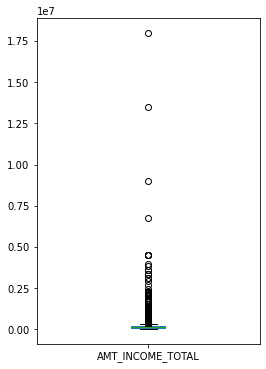

In [38]:
application_data = application_data[application_data.AMT_INCOME_TOTAL <= 100*pow(10,6)]

#Plot a box plot for this column once again

plt.figure(figsize=[4,6])
application_data.AMT_INCOME_TOTAL.plot.box()
plt.show()

- Large amount of data is clustered between income of 0 to 2.5 million units.
- There are some exceptional cases/ outliers are present for the income greater than 5 million units income. So we will again consider the income range below 5 million for further analysis.

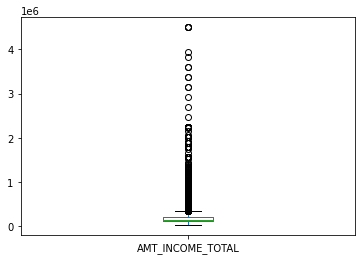

In [39]:
# Checkcing the box plot for values below 5 million.

application_data[application_data.AMT_INCOME_TOTAL <= 5*pow(10,6)].AMT_INCOME_TOTAL.plot.box()

- Still there are some outliers/cases which should be eliminated.
- To do this, we can now analyze the AMT_INCOME_TOTAL below 1 million units and then take the decision for outliers.

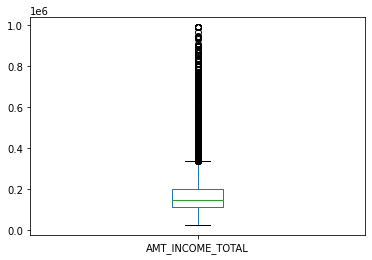

In [40]:
# Checkcing the box plot for values below 5 million.

application_data[application_data.AMT_INCOME_TOTAL <= 1*pow(10,6)].AMT_INCOME_TOTAL.plot.box()

In [41]:
# This looks some appreciable distribution of the income values, where median is between 0.1 million to 0.2 million and 75% quantile is at 0.2 million.
# Eliminating the values that lie in the 99% to 100% quantile.

application_data = application_data[application_data.AMT_INCOME_TOTAL <= 1*pow(10,6)]

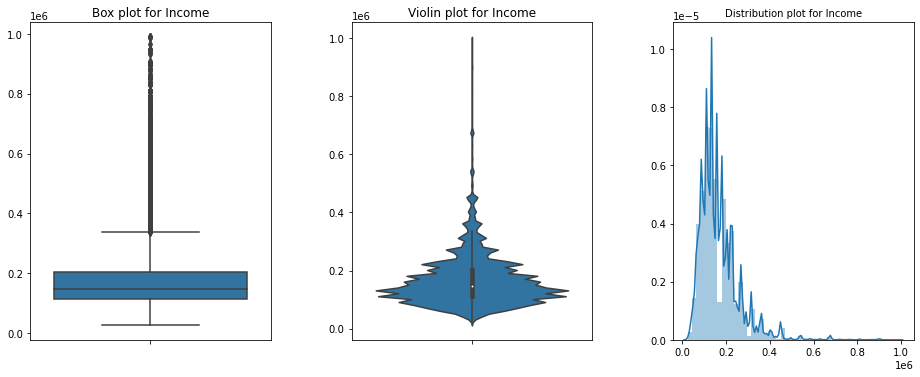

In [42]:
# Let's plot a box plot for AMT_INCOME_TOTAL
# Let's plot a violin plot for AMT_INCOME_TOTAL
# Let's plot a distribution plot for AMT_INCOME_TOTAL

fig, ax = plt.subplots(1, 3, figsize=(13,5))

fig.tight_layout(h_pad=2,w_pad=5)

sns.boxplot(application_data.AMT_INCOME_TOTAL,orient='v',ax=ax[0])
ax[0].set_title('Box plot for Income')

sns.violinplot(application_data.AMT_INCOME_TOTAL,orient='v',ax=ax[1])
ax[1].set_title('Violin plot for Income')

sns.distplot(application_data.AMT_INCOME_TOTAL,ax=ax[2])
ax[2].set_title('Distribution plot for Income', fontsize=10)

for ax in fig.axes:
    plt.sca(ax)
    plt.xlabel('')
    plt.ylabel('')

plt.show()

### Inference from the box plot
- Inference 1: From the box plot, we can say that median value is approximately at 0.15 million and 75% quantile is at 0.2 million and values ranging upto 1 million which can be taken into account for further analysis.
- Inference 2: From the violin plot and distribution plot, we can say that the data is more clustered between 0 and 0.2 million.
- Inference 3: Even though the data is clustered between 0 to 0.2M, the frequency of higher values is lower than the smaller values.

In [43]:
#Displaying the application data

application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  Single / not married  House / apartment       -9461           -637   
1               Married  House / apartment      -16765          -1188   
2  Single / not married  House / apartment      -19046           -225   
3        Civil marriage  House / apartment      -19005          -3039   
4  Single / not married  House / apartment      -19932          -3038   

   CNT_FAM_MEMBERS ORGANIZATION_TYPE  
0              1.0   Business Entity  
1              2.0            School  
2              1.0        Government  
3              2.0   Business Entity  
4              1.0          Religion

In [44]:
# Checking the number of final rows and columns again

application_data.shape

(306971, 19)

In [45]:
#Let's consider AMT_CREDIT column

application_data.AMT_CREDIT.describe()

count    3.069710e+05
mean     5.988585e+05
std      4.019353e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

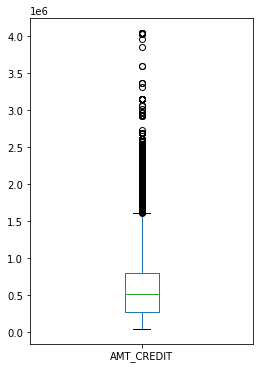

In [46]:
#Let's plot a box plot for this column

plt.figure(figsize=[4,6])
application_data.AMT_CREDIT.plot.box()
plt.show()

- There are some outliers which has value greater than 2.5 million, so we will consider only those values lesser than 2.5 for further analysis.

In [47]:
# Eliminating the values that are greater than 3.5 million

application_data = application_data[application_data.AMT_CREDIT <= 2.5*pow(10,6)]

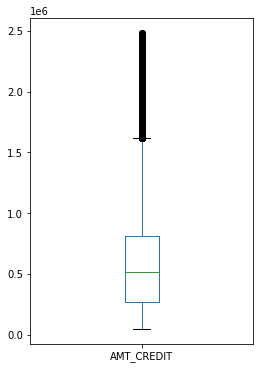

In [48]:
#Let's plot a box plot for this column

plt.figure(figsize=[4,6])
application_data.AMT_CREDIT.plot.box()
plt.show()

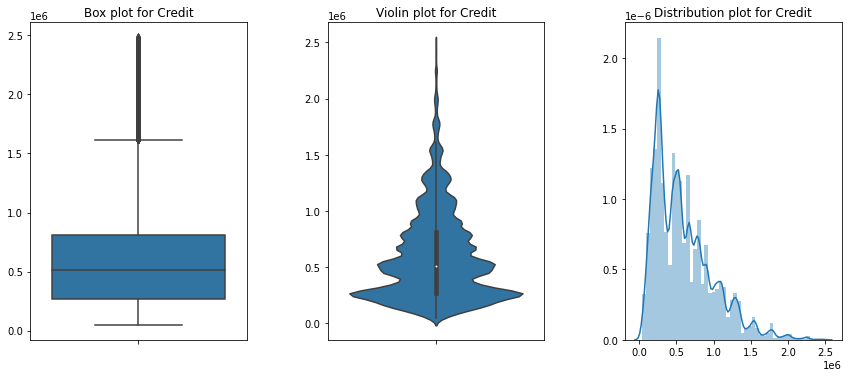

<Figure size 288x360 with 0 Axes>

In [49]:
# Let's plot a  box plot for AMT_CREDIT
# Let's plot a violin plot for AMT_CREDIT
# Let's plot a  distribution plot for AMT_INCOME_TOTAL

fig, ax = plt.subplots(1, 3, figsize=(12,5))

fig.tight_layout(h_pad=2,w_pad=5)

plt.figure(figsize=[4,5])
sns.boxplot(application_data.AMT_CREDIT,orient='v',ax=ax[0])
ax[0].set_title('Box plot for Credit')

sns.violinplot(application_data.AMT_CREDIT,orient='v',ax=ax[1])
ax[1].set_title('Violin plot for Credit')

sns.distplot(application_data.AMT_CREDIT,ax=ax[2])
ax[2].set_title('Distribution plot for Credit')

for ax in fig.axes:
    plt.sca(ax)
    plt.xlabel('')
    plt.ylabel('')
plt.show()

### Inference from the box plot of Credit Amount
- Inference 1: From the box plot, we can say that median value is approximately at 0.5 million and 75% quantile is at 0.7 million and values ranging upto 2.5 million which can be taken into account for further analysis.
- Inference 2: From the violin plot and distribution plot, we can say that the data is more clustered between 0 and 0.7 million, and then frequency is decreased afterwards.
- Inference 3: Even though the data is clustered between 0 to 0.4M, the frequency of higher credit values is lower than the smaller credit values.

In [50]:
#Displaying the application data

application_data.shape

(306618, 19)

In [51]:
# Let's consider the column AMT_ANNUITY for the outliers.

application_data.AMT_ANNUITY.describe()

count    306618.000000
mean      27041.113173
std       14322.435261
min        1615.500000
25%       16524.000000
50%       24894.000000
75%       34587.000000
max      225000.000000
Name: AMT_ANNUITY, dtype: float64

In [52]:
# Check the types of values present in the AMT_ANNUITY column.

application_data.AMT_ANNUITY.dtypes

dtype('float64')

In [53]:
# Let's check the values from the columns that are not integer or float.

odd_man_out_amt_annuity = application_data.AMT_ANNUITY.apply(lambda x: 1 if ((type(x)==int) or (type(x)==float))  else 0)
application_data[odd_man_out_amt_annuity == 0]

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, DAYS_BIRTH, DAYS_EMPLOYED, CNT_FAM_MEMBERS, ORGANIZATION_TYPE]
Index: []

In [54]:
# Consider rows from AMT_ANNIUTY column where there are no objects.

application_data = application_data[odd_man_out_amt_annuity != 0]

In [55]:
# Let's convert the int values to float.

application_data.AMT_ANNUITY = application_data.AMT_ANNUITY.apply(lambda x: float(x))

In [56]:
# Check for the type of values in ANNUITY column again

application_data.AMT_ANNUITY.dtype

dtype('float64')

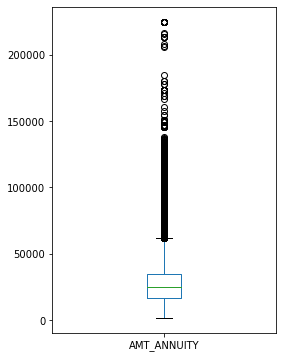

In [57]:
# Let's plot a box plot for the AMT_ANNUITY Column.

plt.figure(figsize=[4,6])
application_data.AMT_ANNUITY.plot.box()
plt.show()

In [58]:
#  Let's consider the data where AMT_ANNUITY value is < 120000 as remaining can affect our analysis.

application_data =  application_data[application_data.AMT_ANNUITY<120000]

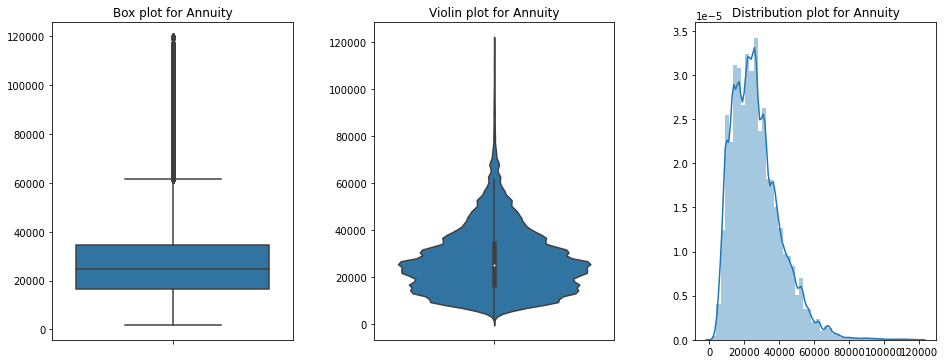

<Figure size 288x432 with 0 Axes>

In [59]:
# Let's plot a  box plot for AMT_ANNUITY
# Let's plot a violin plot for AMT_ANNUITY
# Let's plot a distribution plot for AMT_INCOME_TOTAL

fig, ax = plt.subplots(1, 3, figsize=(13,5))

fig.tight_layout(h_pad=2,w_pad=5)

plt.figure(figsize=[4,6])
sns.boxplot(application_data.AMT_ANNUITY,orient='v',ax=ax[0])
ax[0].set_title('Box plot for Annuity')

sns.violinplot(application_data.AMT_ANNUITY,orient='v',ax=ax[1])
ax[1].set_title('Violin plot for Annuity')

sns.distplot(application_data.AMT_ANNUITY,ax=ax[2])
ax[2].set_title('Distribution plot for Annuity')

for ax in fig.axes:
    plt.sca(ax)
    plt.xlabel('')
    plt.ylabel('')

plt.show()

### Inference from the box plot of Annuity Amount
- Inference 1: From the box plot, we can say that median value is approximately at 30000 and 75% quantile is at 60000; values ranging upto 120000 which can be taken into account for further analysis.
- Inference 2: From the violin plot and distribution plot, we can say that the data is more clustered between 0 and 60000, and then frequency is decreased afterwards.
- Inference 3: Even though the data is clustered between 0 to 60000, the frequency of higher annuity values is lower than the smaller annuity values.

In [60]:
# Let's consider the column AMT_GOODS_PRICE for the outliers.

application_data.AMT_GOODS_PRICE.describe()

count    3.064510e+05
mean     5.352040e+05
std      3.625000e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      2.475000e+06
Name: AMT_GOODS_PRICE, dtype: float64

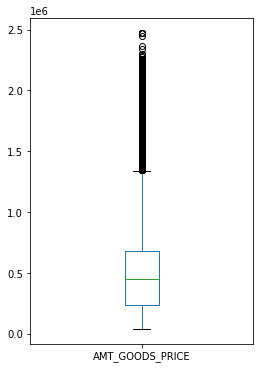

In [61]:
# Let's plot a box plot for the AMT_GOODS_PRICE Column

plt.figure(figsize=[4,6])
application_data.AMT_GOODS_PRICE.plot.box()
plt.show()

In [62]:
# Let's consider the values below 2 million units

application_data =  application_data[application_data.AMT_GOODS_PRICE<2*pow(10,6)]

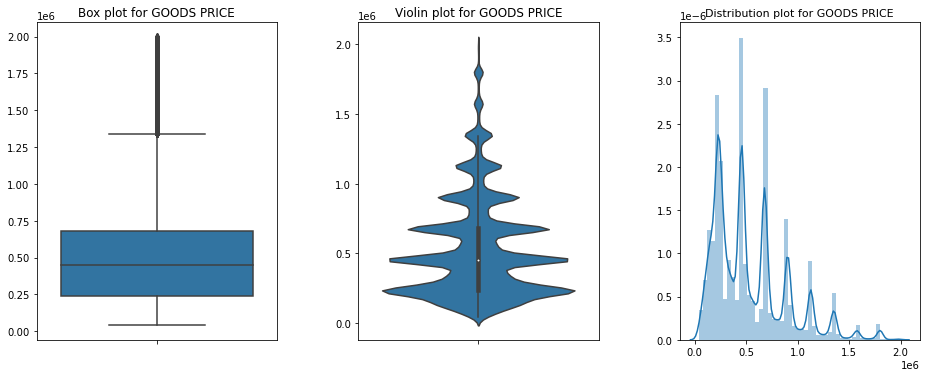

<Figure size 288x432 with 0 Axes>

In [63]:
# Let's plot a  box plot for AMT_GOODS_PRICE
# Let's plot a violin plot for AMT_GOODS_PRICE
# Let's plot a distribution plot for AMT_GOODS_PRICE

fig, ax = plt.subplots(1, 3, figsize=(13,5))

fig.tight_layout(h_pad=2,w_pad=5)

plt.figure(figsize=[4,6])
sns.boxplot(application_data.AMT_GOODS_PRICE,orient='v',ax=ax[0])
ax[0].set_title('Box plot for GOODS PRICE')

sns.violinplot(application_data.AMT_GOODS_PRICE,orient='v',ax=ax[1])
ax[1].set_title('Violin plot for GOODS PRICE')

sns.distplot(application_data.AMT_GOODS_PRICE,ax=ax[2])
ax[2].set_title('Distribution plot for GOODS PRICE', fontsize=11)

for ax in fig.axes:
    plt.sca(ax)
    plt.xlabel('')
    plt.ylabel('')
    
plt.show()

### Inference from the box plot of Goods Price
- Inference 1: From the box plot, we can say that median value is approximately at 0.5 million and 75% quantile is at 0.60 million; values ranging upto 2 million which can be taken into account for further analysis.
- Inference 2: From the violin plot and distribution plot, we can say that frequency of the goods price amount is decreasing in zig zag manner. It's highest between 0 to 0.5M and then decreasing with spikes in between.

In [64]:
# Let's display the data again for further analysis

application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0  Single / not married  House / apartment       -9461           -637   
1               Married  House / apartment      -16765          -1188   
2  Single / not married  House / apartment      -19046           -225   
3        Civil marriage  House / apartment      -19005          -3039   
4  Single / not married  House / apartment      -19932          -3038   

   CNT_FAM_MEMBERS ORGANIZATION_TYPE  
0              1.0   Business Entity  
1              2.0            School  
2              1.0        Government  
3              2.0   Business Entity  
4              1.0          Religion

- Now let's analyze the outliers for DAYS_BIRTH and DAYS_EMPLOYED columns
- The values in this column are taken w.r.t date of application, so we have to change the sign of the numbers for understanding purpose.
- We can then convert days to years and then assign those to new columns.

In [65]:
# Check the statistical information of the DAYS_BIRTH columns

application_data.DAYS_BIRTH.describe()

count    305778.000000
mean     -16038.556587
std        4365.780321
min      -25201.000000
25%      -19685.000000
50%      -15752.000000
75%      -12412.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [66]:
# Check the statistical information of the DAYS_EMPLOYED columns

application_data.DAYS_EMPLOYED.describe()

count    305778.000000
mean      63983.964023
std      141413.949914
min      -17912.000000
25%       -2757.000000
50%       -1211.000000
75%        -287.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

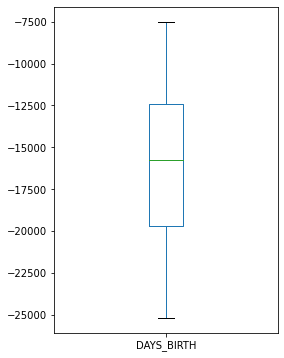

In [67]:
# Let's plot a  box plot for DAYS_BIRTH

plt.figure(figsize=[4,6])
application_data.DAYS_BIRTH.plot.box()
plt.show()

### Inferences from the box plot for Days Birth
- Inference1: No outliers are observed from the boxplot of Days birth and thus outliers handling is not required in this case.

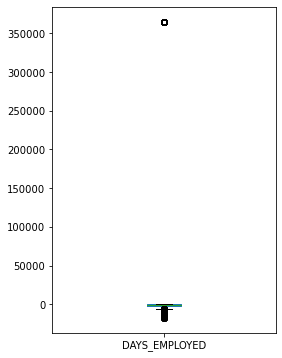

In [68]:
# Let's plot a  box plot for DAYS_EMPLOYED

plt.figure(figsize=[4,6])
application_data.DAYS_EMPLOYED.plot.box()
plt.show()

In [69]:
#Checking the percentage of values greater than 350000

(application_data[application_data.DAYS_EMPLOYED>=350000].shape[0]/application_data.shape[0])*100

18.052639496628274

- We can see there are some outliers which have values >350000, those can be positive inifinity values
- We will keep those values as null because that may affect our analysis for the columns.
- Also, assigning that large number of values with median/mean may hamper our analysis, as the percentage of such values is very huge i.e. ~18%.

In [70]:
# We can see an outlier having >350000 value.  So we can ignore such values and keep those as null
# Converting those days values into years and then storing into new columns.

application_data['YEARS_BIRTH'] = application_data.DAYS_BIRTH.apply(lambda x: -x/365.0)
application_data.DAYS_EMPLOYED[application_data.DAYS_EMPLOYED > 350000] = np.NaN
application_data['YEARS_EMPLOYED'] = application_data.DAYS_EMPLOYED.apply(lambda x: -x/365.0)

In [71]:
# Deleting the days columns

del application_data['DAYS_BIRTH']
del application_data['DAYS_EMPLOYED']

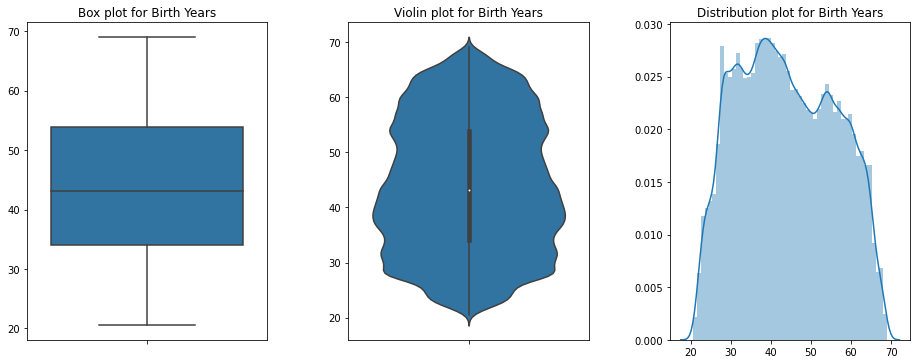

<Figure size 288x432 with 0 Axes>

In [72]:
# Let's plot a  box plot for YEARS_BIRTH
# Let's plot a violin plot for YEARS_BIRTH
# Let's plot a distribution plot for YEARS_BIRTH

fig, ax = plt.subplots(1, 3, figsize=(13,5))

fig.tight_layout(h_pad=2,w_pad=5)

plt.figure(figsize=[4,6])
# application_data.YEARS_BIRTH.plot.box()
sns.boxplot(application_data.YEARS_BIRTH,orient='v',ax=ax[0])
ax[0].set_title('Box plot for Birth Years')

sns.violinplot(application_data.YEARS_BIRTH,orient='v',ax=ax[1])
ax[1].set_title('Violin plot for Birth Years')

sns.distplot(application_data.YEARS_BIRTH,ax=ax[2])
ax[2].set_title('Distribution plot for Birth Years', fontsize=12)

for ax in fig.axes:
    plt.sca(ax)
    plt.xlabel('')
    plt.ylabel('')

plt.show()

### Inference from the box plot of Birth Years
- Inference 1: From the box plot, we can say that median value is approximately at 50% quantile, and the data is evenly spread.
- Inference 2: From the violin plot and distribution plot, we can say that the data is distributed uniformly as there are not sudden drops or any spikes in the distribution.
- Inference 3: Although, the frequency for the end values is less compared to mid values, that's why we can observe sudden spike at both start and the end in the histogram.

- The values are equally spread through out the data and there are no outliers present in the data, so we dont have to deal with it. 

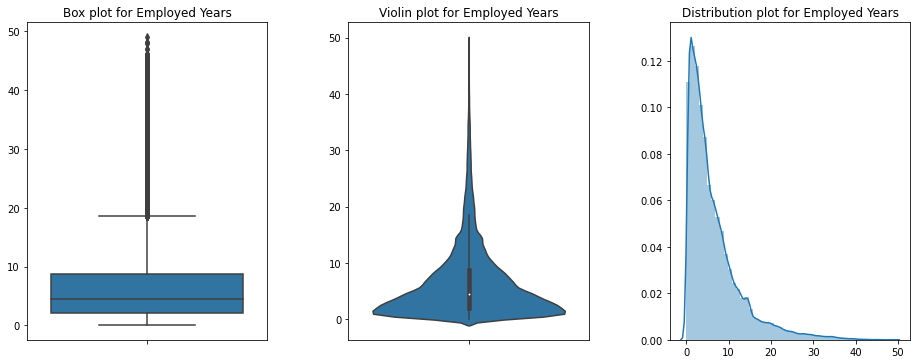

<Figure size 288x432 with 0 Axes>

In [73]:
# Let's plot a  box plot for YEARS_EMPLOYED
# Let's plot a violin plot for YEARS_EMPLOYED
# Let's plot a distribution plot for YEARS_BIRTH

fig, ax = plt.subplots(1, 3, figsize=(13,5))

fig.tight_layout(h_pad=2,w_pad=5)

plt.figure(figsize=[4,6])
# application_data.YEARS_BIRTH.plot.box()
sns.boxplot(application_data.YEARS_EMPLOYED,orient='v',ax=ax[0])
ax[0].set_title('Box plot for Employed Years')

sns.violinplot(application_data.YEARS_EMPLOYED,orient='v',ax=ax[1])
ax[1].set_title('Violin plot for Employed Years')

sns.distplot(application_data.YEARS_EMPLOYED,ax=ax[2])
ax[2].set_title('Distribution plot for Employed Years', fontsize=12)

for ax in fig.axes:
    plt.sca(ax)
    plt.xlabel('')
    plt.ylabel('')
plt.show()

### Inference from the box plot of Employed Years
- Inference 1: From the box plot, we can say that median value is approximately at 4 years, 75% quantile data is at 10 years, and ranges upto 50 years..
- Inference 2: From the violin plot and distribution plot, we can say that the data is clustered in large percentage between 0 to 10 years and the frequency of the years more than 10 is decreasing till the end.


- Now the data imbalance is reduced significantly after replacing the outliers. We will proceed with further analysis.

## Univariate Analysis for Columns
- We will now analyze the data spread across individual columns and create some better visualizations.
- We will use various graphs such as bar graph, pie charts, histograms if required.

In [74]:
# Displaying the data again

application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  CNT_FAM_MEMBERS ORGANIZATION_TYPE  \
0  Single / not married  House / apartment              1.0   Business Entity   
1               Married  House / apartment              2.0            School   
2  Single / not married  House / apartment              1.0        Government   
3        Civil marriage  House / apartment              2.0   Business Entity   
4  Single / not married  House / apartment              1.0          Religion   

   YEARS_BIRTH  YEARS_EMPLOYED  
0    25.920548        1.745205  
1    45.931507        3.254795  
2    52.180822        0.616438  
3    52.068493        8.326027  
4    54.608219        8.323288

## Analyzing Target customers

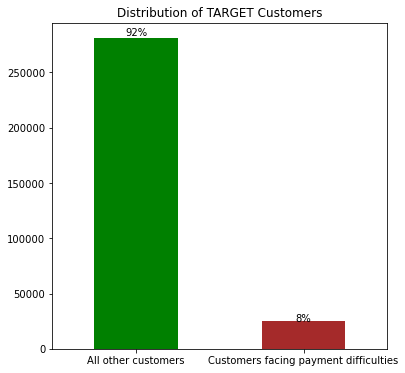

In [75]:
# Let's analyze how targeted customers are spread across the data

plt.figure(figsize=[6,6])
targets = application_data.TARGET.value_counts()
graph = targets.plot.bar(color=['G','brown'])
plt.xticks([0,1],['All other customers','Customers facing payment difficulties'],rotation=0)
graph.set_title("Distribution of TARGET Customers")

for p in graph.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    graph.annotate(f'{height/targets.sum():.0%}', (x + width/2, y + height*1.01), ha='center')
plt.show()

### Inference from the Box Plot
- Inference 1: The no. of customers facing payment issues is significantly less than the customers facing no difficulties (all other cases in our sample).
- Inference 2: 92% of the customers are not facing any payment difficulties and may not liekly to default, where as 8% of the customers are facing payment difficulties and likely to default.

Now we need to understand how consumer attributes and loan attributes influence the tendency of default which will be required by the company for its risk asessment.
Let's proceed further for univariate analysis.

## Analysis of customers for Loan Types, Genders, Owning Cars and Owning Flats

In [76]:
# Let's analyze the genders of the customers

application_data.CODE_GENDER.value_counts()

F      201483
M      104291
XNA         4
Name: CODE_GENDER, dtype: int64

In [77]:
# We have found there are some XNA values are present in Gender Category.
# we will remove those as there are very less count of such values are present (May be outliers or unknown).

application_data.CODE_GENDER = application_data.CODE_GENDER.apply(lambda x: np.NaN if x=='XNA' else x)
application_data.CODE_GENDER = application_data.CODE_GENDER[~application_data.CODE_GENDER.isnull()]
application_data.CODE_GENDER.value_counts()

F    201483
M    104291
Name: CODE_GENDER, dtype: int64

In [78]:
# Let's analyze the loan types 

application_data.NAME_CONTRACT_TYPE.value_counts()

Cash loans         276892
Revolving loans     28886
Name: NAME_CONTRACT_TYPE, dtype: int64

In [79]:
# Let's analyze the column containing customers having cars or not 

application_data.FLAG_OWN_CAR.value_counts()

N    202026
Y    103752
Name: FLAG_OWN_CAR, dtype: int64

In [80]:
# Let's analyze the column containing customers having flats or not 

application_data.FLAG_OWN_REALTY.value_counts()

Y    212308
N     93470
Name: FLAG_OWN_REALTY, dtype: int64

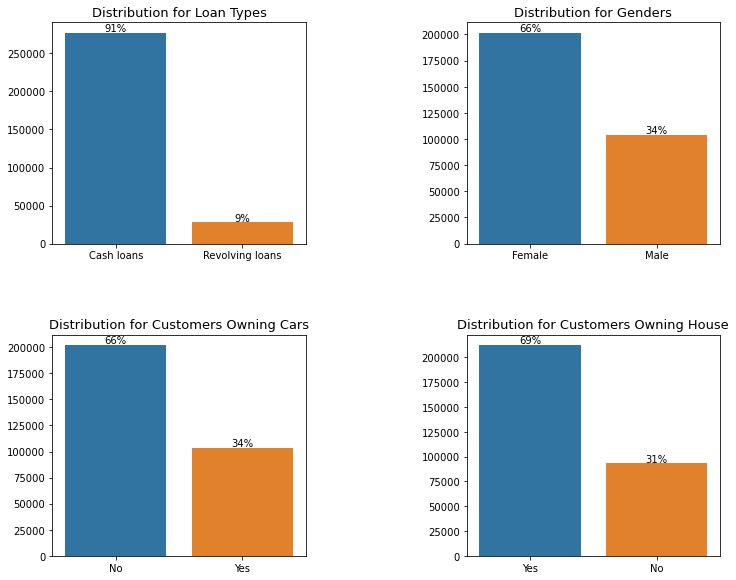

In [81]:
# We will plot multiple subplot to analyze the columns.
# There plots contain analysis of customers for Loan Types, Genders, Owning Cars and Owning Flats.

fig, ax = plt.subplots(2, 2, figsize=(10,8))
# Making a plot with 2 subplots

loan_types = application_data.NAME_CONTRACT_TYPE.value_counts()
genders = application_data.CODE_GENDER.value_counts()
owns_cars = application_data.FLAG_OWN_CAR.value_counts()
own_reality = application_data.FLAG_OWN_REALTY.value_counts()

fig.tight_layout(h_pad=7,w_pad=13)
sns.barplot(x=loan_types.index, y=loan_types, ax=ax[0][0])
ax[0][0].set_title("Distribution for Loan Types", fontsize=13)
sns.barplot(x=genders.index, y=genders, ax=ax[0][1])
ax[0][1].set_title("Distribution for Genders", fontsize=13)
ax[0][1].set_xticklabels(['Female','Male'])
sns.barplot(x=owns_cars.index, y=owns_cars, ax=ax[1][0])
ax[1][0].set_title("Distribution for Customers Owning Cars", fontsize=13)
ax[1][0].set_xticklabels(['No','Yes'])
sns.barplot(x=own_reality.index, y=own_reality, ax=ax[1][1])
ax[1][1].set_title("Distribution for Customers Owning House", fontsize=13)
ax[1][1].set_xticklabels(['Yes','No'])

graphs = [loan_types,genders,owns_cars,own_reality]
count = 0
for ax in fig.axes:
    plt.sca(ax)
    plt.xlabel('')
    plt.ylabel('')
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height/graphs[count].sum():.0%}', (x + width/2, y + height*1.01), ha='center')
    count+=1
plt.show()

### Inferences drawn from the Bar Graphs
- From  *Distribution of Loan types* plot we can say that customers are taking more cash loans i.e. personal or business loans in cash. Very less people are going for revolving loans although it is more flexible. `91% are customers taking Cash Loans, where as the 9% are the people taking Revolving Loans.`
- From  *Distribution of Genders* plot it can be observed that Female borrowers are more way more than male. `91% are customers are males and 34% customers are female.`
- From  *Distribution of Owning Cars* plot we can see that less customers are having cars. So peoples having having cars dont opt for loans much.:) `66% customers Owns car, where as 34% customers don't own cars.`
- From  *Distribution of Owning House* plot we can say that majority of the customers (about 70 % ) are having their own house. `31% people Owns house, where as 69% of people owns flat.`

## Analysis of the children count spread across the data

In [82]:
# Let's analyze the children count spread across the data
application_data.CNT_CHILDREN.value_counts()

0     214158
1      60769
2      26605
3       3697
4        423
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

In [83]:
# There are some exceptional cases here now, as those who customers have children more than 10 are very less in count. 
# So we can ignore those values.
application_data = application_data[application_data.CNT_CHILDREN<=10]
application_data.CNT_CHILDREN.value_counts()

0     214158
1      60769
2      26605
3       3697
4        423
5         84
6         21
7          7
10         2
9          2
8          2
Name: CNT_CHILDREN, dtype: int64

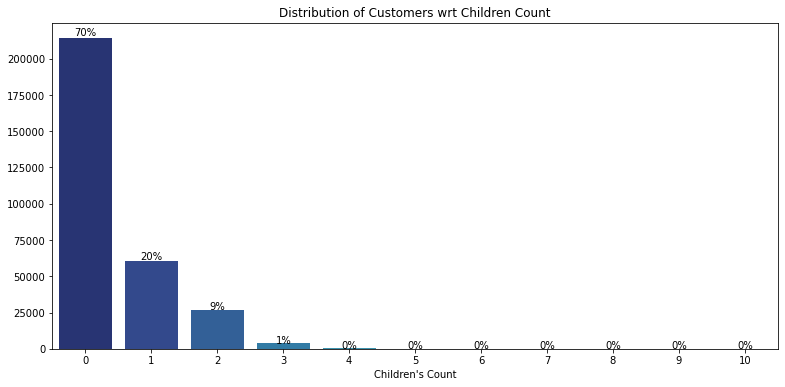

In [84]:
# Let's analyze how distribution is spread across the customers with respect to Children Count
plt.figure(figsize=[13,6])
counts = application_data.CNT_CHILDREN.value_counts()
graph = sns.barplot(x = counts.index, y = counts, palette='YlGnBu_r')
plt.xticks(rotation=0)
graph.set_title("Distribution of Customers wrt Children Count")
plt.xlabel('Children\'s Count')
plt.ylabel('')

for p in graph.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    graph.annotate(f'{height/counts.sum():.0%}', (x + width/2, y + height*1.01), ha='center')
plt.show()

### Inferences from the Bar Plot for Children's Count
- No. of customers having no children is highest (almost 70%). Thus we can guess that may be majority of the customers having loans are unmarried and without family, may be students and young working professionals.
- The percentage of people gradually decreases as the children count increases.

## Analysis of customers for Income Types, Family Status, Education Types, Housing Types

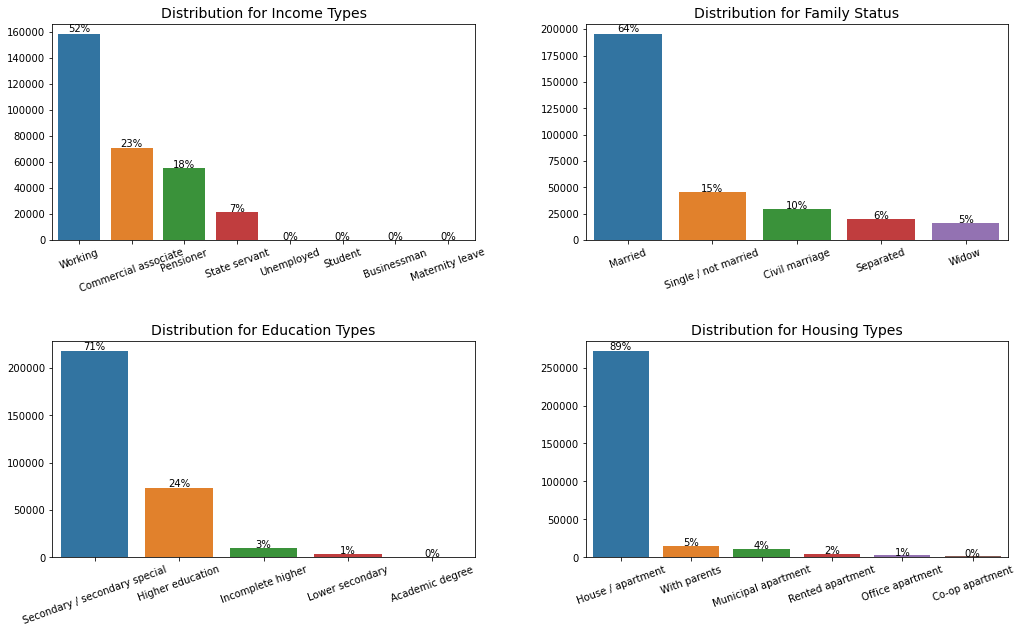

In [85]:
# We will plot multiple subplot to analyze the columns.
# There plots contain analysis of customers for Income Types, Family Status, Education Types, Housing Types.

fig, ax = plt.subplots(2, 2, figsize=(14,8))
# Making a plot with 2 subplots

income_types    = application_data.NAME_INCOME_TYPE.value_counts()
family_status   = application_data.NAME_FAMILY_STATUS.value_counts()
education_types = application_data.NAME_EDUCATION_TYPE.value_counts()
housing_types   = application_data.NAME_HOUSING_TYPE.value_counts()

fig.tight_layout(h_pad=8,w_pad=8)
sns.barplot(x=income_types.index, y=income_types, ax=ax[0][0])
ax[0][0].set_title("Distribution for Income Types", fontsize=14)
sns.barplot(x=family_status.index, y=family_status, ax=ax[0][1])
ax[0][1].set_title("Distribution for Family Status", fontsize=14)
sns.barplot(x=education_types.index, y=education_types, ax=ax[1][0])
ax[1][0].set_title("Distribution for Education Types", fontsize=14)
sns.barplot(x=housing_types.index, y=housing_types, ax=ax[1][1])
ax[1][1].set_title("Distribution for Housing Types", fontsize=14)

graphs = [income_types,family_status,education_types,housing_types]
count = 0
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=20)
    plt.xlabel('')
    plt.ylabel('')
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height/graphs[count].sum():.0%}', (x + width/2, y + height*1.01), ha='center')
    count+=1
plt.show()

### Inferences from the Bar Graphs
- From the *Distribution of income types* plot we can infer that customers are mostly working professionals followed by commercial associate, pensioner, state servant, unemployed, student, businessman, maternity leave. Two possibilities can be there in the income types having less no. of customers   - 1. They have been rejeted 2. They cancelled it or may be didnt opt for loans. For example unempoyed would likely to be rejected by the company. 52% of the customers are working professionals.
- From the *Distribution of Family status* plot we can see that mostly married customers are present. There is a significant difference between the counts of married , unmarried and other categories. So or last inference from children count plot wont stand out. Therefore combinig both we can say that no. of married customers having no children is highest. 64% of the customers are married.
- From the *Distribution of education types* plot it can be observed that majority of tye customers are having secondary eduction. Highly educated are less in no. 71% of the customers have completed secondary/secondary sepcial.
- From the *Distribution of Housing types* plot we can see that maximum customers are having house or apartments of their own which we already got an idea from the owning realty variable. People staying in rented apartments, office appartments and co-operative apartments are less in number. 89% of the customers have house/apartment as housing type. 

In [86]:
# Displaying the application data dataframe 

application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  CNT_FAM_MEMBERS ORGANIZATION_TYPE  \
0  Single / not married  House / apartment              1.0   Business Entity   
1               Married  House / apartment              2.0            School   
2  Single / not married  House / apartment              1.0        Government   
3        Civil marriage  House / apartment              2.0   Business Entity   
4  Single / not married  House / apartment              1.0          Religion   

   YEARS_BIRTH  YEARS_EMPLOYED  
0    25.920548        1.745205  
1    45.931507        3.254795  
2    52.180822        0.616438  
3    52.068493        8.326027  
4    54.608219        8.323288

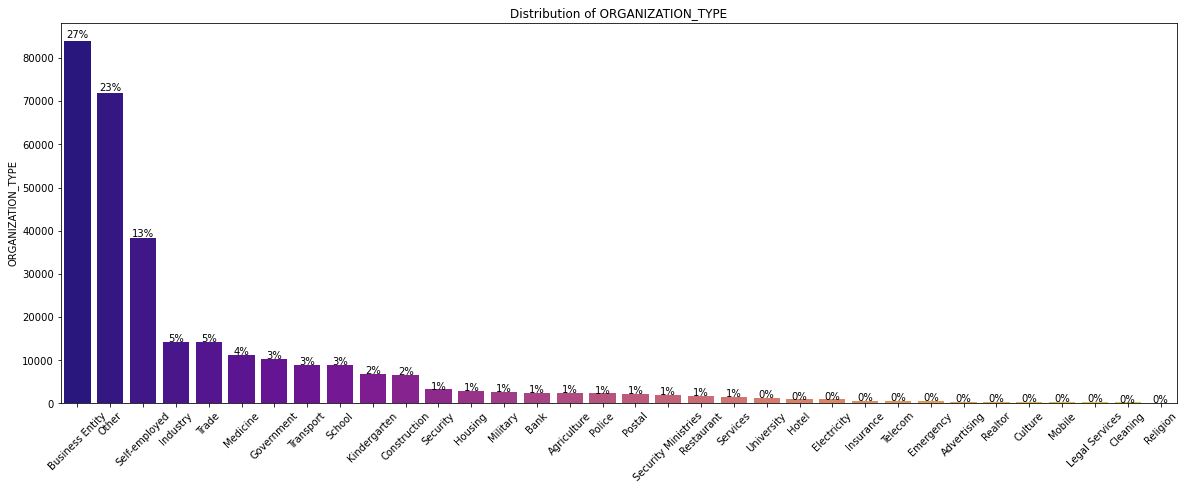

In [87]:
# Let's analyze how ORGANIZATION_TYPE types are spread across the data

plt.figure(figsize=[20,7])
counts = application_data.ORGANIZATION_TYPE.value_counts()
graph = sns.barplot(x = counts.index, y = counts, palette="plasma")
plt.xticks(rotation=45)
graph.set_title("Distribution of ORGANIZATION_TYPE")
for p in graph.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    graph.annotate(f'{height/counts.sum():.0%}', (x + width/2, y + height*1.01), ha='center')

plt.show()

### Inferences from the Bar Graph
- From *Distribution of Organization Type* it can be observed that Business Entity is the organization type having the highest number of customer and Religion having the least. 
- 27% of the customers have business entity as the organization type. 

In [88]:
# Displaying the application data dataframe 

application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  CNT_FAM_MEMBERS ORGANIZATION_TYPE  \
0  Single / not married  House / apartment              1.0   Business Entity   
1               Married  House / apartment              2.0            School   
2  Single / not married  House / apartment              1.0        Government   
3        Civil marriage  House / apartment              2.0   Business Entity   
4  Single / not married  House / apartment              1.0          Religion   

   YEARS_BIRTH  YEARS_EMPLOYED  
0    25.920548        1.745205  
1    45.931507        3.254795  
2    52.180822        0.616438  
3    52.068493        8.326027  
4    54.608219        8.323288

## Analysis of the family member's count column

In [89]:
# Let's analyze the family member's count column

application_data.CNT_FAM_MEMBERS.value_counts()

2.0     157381
1.0      67557
3.0      52294
4.0      24564
5.0       3458
6.0        403
7.0         81
8.0         20
9.0          6
10.0         3
12.0         2
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [90]:
# We will change the type of the column from float to int
    
application_data.CNT_FAM_MEMBERS = application_data.CNT_FAM_MEMBERS.astype('int')
application_data.CNT_FAM_MEMBERS.value_counts()

2     157381
1      67557
3      52294
4      24564
5       3458
6        403
7         81
8         20
9          6
10         3
12         2
11         1
Name: CNT_FAM_MEMBERS, dtype: int64

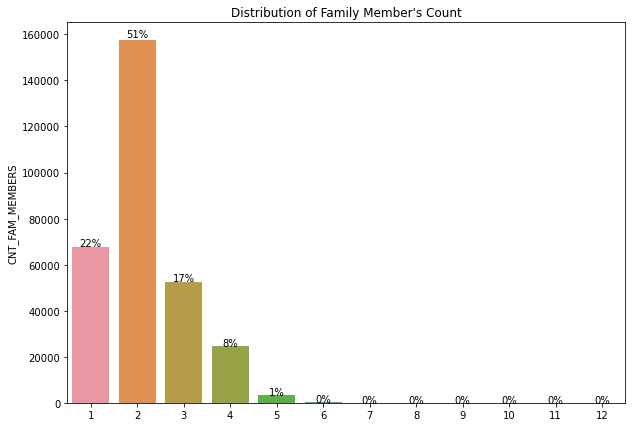

In [91]:
# Let's plot a bar graph for to visualize the districution

plt.figure(figsize=[10,7])
counts = application_data.CNT_FAM_MEMBERS.value_counts()
graph = sns.barplot(x = counts.index, y = counts)
plt.xticks(rotation=0)
graph.set_title("Distribution of Family Member's Count")
for p in graph.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    graph.annotate(f'{height/counts.sum():.0%}', (x + width/2, y + height*1.01), ha='center')
plt.show()

### Inferences from the Bar Graph of Family Member's Count
- Although number of family members ranges from 1 to 12, no, of custoners hving 2 family members is maximum.
- Almost 51% of the families have 2 family members and 22% of the families have 1 family members (Probably singles).

In [92]:
# Didplaying the application data dataframe

application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  CNT_FAM_MEMBERS ORGANIZATION_TYPE  \
0  Single / not married  House / apartment                1   Business Entity   
1               Married  House / apartment                2            School   
2  Single / not married  House / apartment                1        Government   
3        Civil marriage  House / apartment                2   Business Entity   
4  Single / not married  House / apartment                1          Religion   

   YEARS_BIRTH  YEARS_EMPLOYED  
0    25.920548        1.745205  
1    45.931507        3.254795  
2    52.180822        0.616438  
3    52.068493        8.326027  
4    54.608219        8.323288

In [93]:
# Let's check the shape before heading towards bivariate analysis

application_data.shape

(305770, 19)

## Bivariate Analysis for Target Column
- We will analyze the Target column with all other columns one by one to create visualizations.
- We can determine which columns to consider for bivariate analysis using correlation of the columns with the Target Column.
- We can analyze and  visualize  the distribution of the drivng factors behind loan defaults across the customers who are facing difficulties and all other cases.
- We can thus determine what are the probable indicators that may lead the customers to default.

- We will split the data w.r.t. Target Variables into two different dataframes, so that it will be easier to compare multiple factors that may affect the target variable.

In [94]:
# We will split the data into two categories: clients facing difficulties and all other types, so that we can draw inferences for both the types easily

customers_facing_difficulties = application_data[application_data.TARGET == 1]
all_other_types_customers = application_data[application_data.TARGET == 0]

In [95]:
# Let's display the final cleaned data

application_data.head(7)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   

   AMT_GOODS_PRICE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0               Working  Secondary / secondary special   
1        1129500.0         State servant               Higher education   
2         135000.0               Working  Secondary / secondary special   
3         297000.0               Working  Secondary / secondary special   
4         513000.0               Working  Secondary / secondary special   
5         454500.0         State servant  Secondary / secondary special   
6        1395000.0  Commercial associate               Higher education   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  CNT_FAM_MEMBERS ORGANIZATION_TYPE  \
0  Single / not married  House / apartment                1   Business Entity   
1               Married  House / apartment                2            School   
2  Single / not married  House / apartment                1        Government   
3        Civil marriage  House / apartment                2   Business Entity   
4  Single / not married  House / apartment                1          Religion   
5               Married  House / apartment                2             Other   
6               Married  House / apartment                3   Business Entity   

   YEARS_BIRTH  YEARS_EMPLOYED  
0    25.920548        1.745205  
1    45.931507        3.254795  
2    52.180822        0.616438  
3    52.068493        8.326027  
4    54.608219        8.323288  
5    46.413699        4.350685  
6    37.747945        8.575342

In [96]:
# Finding correlations with the target and sorted 

correlations= application_data.corr()['TARGET'].sort_values()

#Display the correlations

print(correlations)

YEARS_BIRTH        -0.078623
YEARS_EMPLOYED     -0.074849
AMT_GOODS_PRICE    -0.037633
AMT_CREDIT         -0.028100
AMT_INCOME_TOTAL   -0.021420
AMT_ANNUITY        -0.009876
SK_ID_CURR         -0.002085
CNT_FAM_MEMBERS     0.009336
CNT_CHILDREN        0.019260
TARGET              1.000000
Name: TARGET, dtype: float64


### Inferences from the Correlation Values:
- Although Pearson correlation coefficient  is not the greatest method to represent relevance, but it can give us some ideas of possible relationships within the data.
- We can see that, years birth is negatively correlated with higher percentage to Target Variable.
- Annuity, Owning House and Children count is related with lower percentage that means there is no strong relation between Target and those columns.

- However, this is just a single factor that can lead to wrong insights, we have to consider the combination of several other factors that may affect the target variable.

### Analysis for number of customers on the basis of Loan Types, Gender, Owning Cars and Owning House wr.t Target Variables.

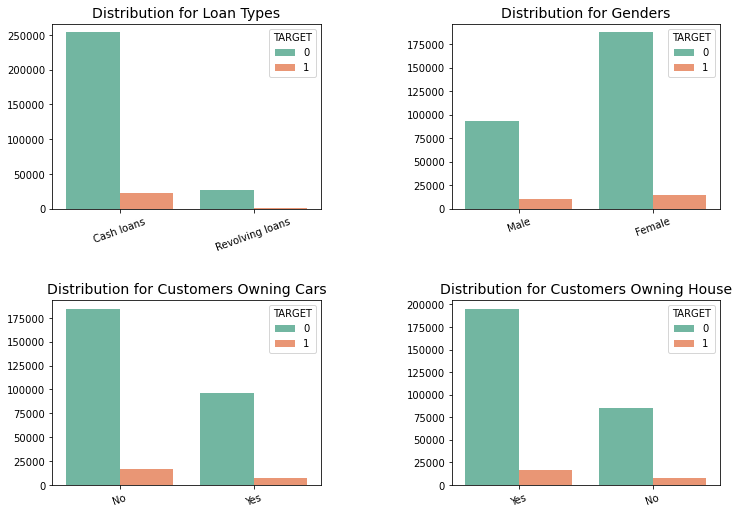

In [97]:
# We will plot multiple subplot to analyze the distribution for target variable against multiple columns
# There plots contain analysis of Target Vs Contract Type, Gender, Whether Customer Owns car or not, Whether Customer owns a house/flat.

fig, ax = plt.subplots(2, 2, figsize=(10,7))
# Making a plot with 2 subplots


fig.tight_layout(h_pad=7,w_pad=10)
sns.countplot(x=application_data.NAME_CONTRACT_TYPE, hue = application_data.TARGET, ax=ax[0][0], palette = "Set2")
ax[0][0].set_title("Distribution for Loan Types", fontsize=14)
sns.countplot(x=application_data.CODE_GENDER, hue = application_data.TARGET, ax=ax[0][1], palette = "Set2")
ax[0][1].set_title("Distribution for Genders", fontsize=14)
ax[0][1].set_xticklabels(['Male','Female'])
sns.countplot(x=application_data.FLAG_OWN_CAR, hue = application_data.TARGET, ax=ax[1][0], palette = "Set2")
ax[1][0].set_title("Distribution for Customers Owning Cars", fontsize=14)
ax[1][0].set_xticklabels(['No','Yes'])
sns.countplot(x=application_data.FLAG_OWN_REALTY, hue = application_data.TARGET, ax=ax[1][1], palette = "Set2")
ax[1][1].set_title("Distribution for Customers Owning House", fontsize=14)
ax[1][1].set_xticklabels(['Yes','No'])

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=20)
    plt.xlabel('')
    plt.ylabel('')

plt.show()

### Inferences from the above bar graphs:
- Inference1: Contract type Revolving loans are just a small fraction (10%) from the total number of loans; in the same time, a larger amount of Revolving loans, comparing with their frequency, are not repaid.

- Inference2: The number of female clients is almost double the number of male clients. Looking to the percent of defaulted credits, males have a higher chance of not returning their loans( around 10%), comparing with women( around 7%).

- Inference3: The customers that own a car are almost a half of the ones that doesnot own one. The customers that own a car are less likely to not repay the loan  than the ones that doesnt own. Both categories have not-repayment rates around 8%-9%.

- Inference4: The customers that own real estate are more than double of the ones that doesnot own. Both categories (owning real estate or not owning) have not-repayment rates less than 8%.

### Analysis for distribution of goods, annuity, credit and income amount for Target Variable

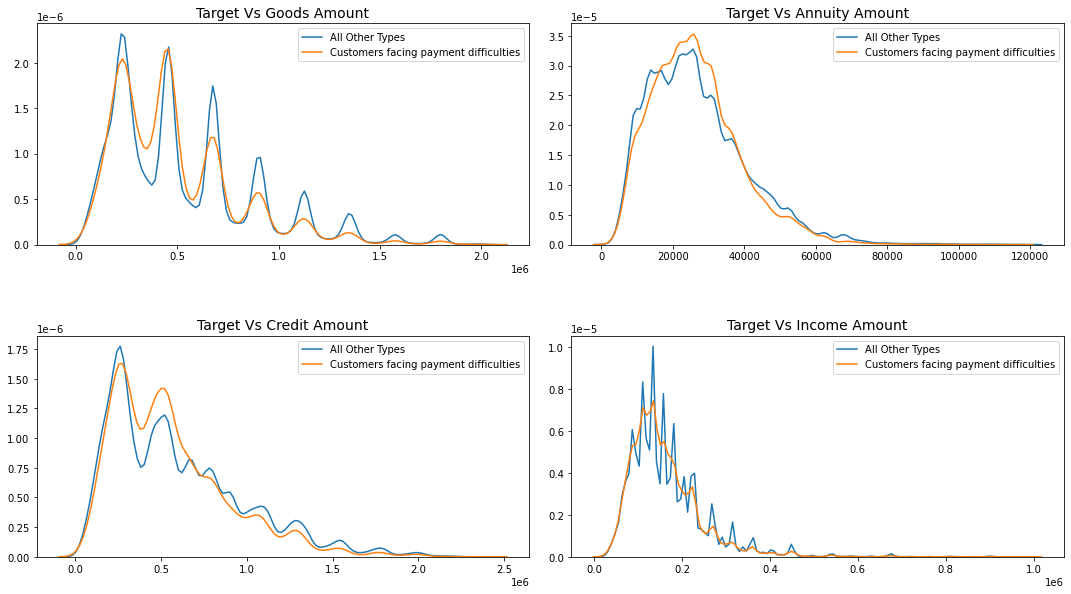

In [98]:
# We will plot multiple subplot to analyze the distribution for target variable against multiple columns.
# There plots contain analysis of Target Vs Amount Goods Price, Amount Annuity Price, Amount Credit, Amount Income Total

fig, ax = plt.subplots(2, 2, figsize=(15,8))
# Making a plot with 2 subplots

fig.tight_layout(h_pad=7)

sns.distplot(application_data[application_data.TARGET == 0].AMT_GOODS_PRICE,hist=False, label="All Other Types", ax=ax[0][0])
sns.distplot(application_data[application_data.TARGET == 1].AMT_GOODS_PRICE,hist=False, label="Customers facing payment difficulties", ax=ax[0][0])
ax[0][0].set_title("Target Vs Goods Amount", fontsize=14)

sns.distplot(application_data[application_data.TARGET == 0].AMT_ANNUITY,hist=False, label="All Other Types", ax=ax[0][1])
sns.distplot(application_data[application_data.TARGET == 1].AMT_ANNUITY,hist=False, label="Customers facing payment difficulties", ax=ax[0][1])
ax[0][1].set_title("Target Vs Annuity Amount", fontsize=14)

sns.distplot(application_data[application_data.TARGET == 0].AMT_CREDIT,hist=False, label="All Other Types", ax=ax[1][0])
sns.distplot(application_data[application_data.TARGET == 1].AMT_CREDIT,hist=False, label="Customers facing payment difficulties", ax=ax[1][0])
ax[1][0].set_title("Target Vs Credit Amount", fontsize=14)

sns.distplot(application_data[application_data.TARGET == 0].AMT_INCOME_TOTAL,hist=False, label="All Other Types", ax=ax[1][1])
sns.distplot(application_data[application_data.TARGET == 1].AMT_INCOME_TOTAL,hist=False, label="Customers facing payment difficulties", ax=ax[1][1])
ax[1][1].set_title("Target Vs Income Amount", fontsize=14)

for ax in fig.axes:
    plt.sca(ax)
    plt.xlabel('')
    plt.ylabel('')

plt.show()


### Inference from the above Distribution Plots against Target Variables:
- Inference 1: In general, we can't see any signicant patterns to analyse, as both the target==1 and target==0 curves showing almost similar plot pattern. However there is slightly different pattern observed from the distribution plots.
- Inference 2: Those who have annuity amount between 20000 to 40000, the default behaviour observed is more as compared to all other cases.
- Inference 3: Those who have credit amount near 0.5M are likely to default more as compared to other cases.

### Analysis for distribution for birth and employment years for Target Variables

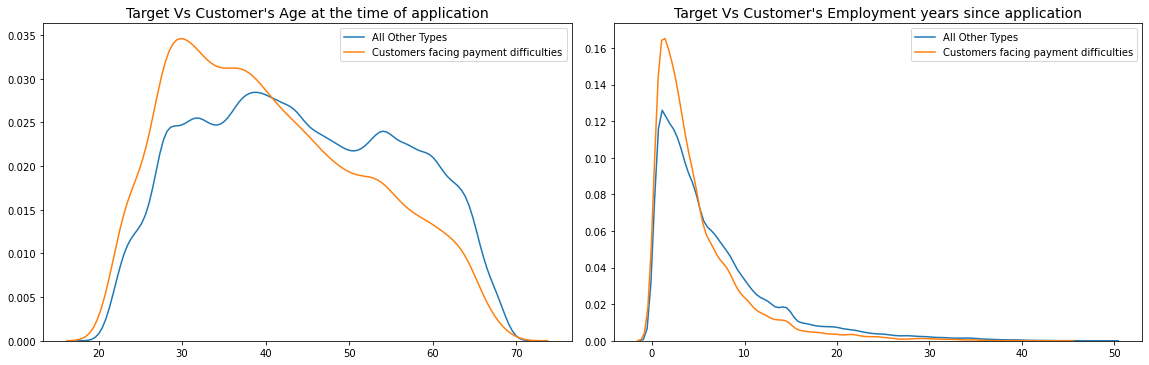

In [99]:
# We will plot multiple subplot to analyze the distribution for target variable against multiple columns
# There plots contain analysis of Target Vs YEARS_BIRTH, YEARS_EMPLOYED

fig, ax = plt.subplots(1, 2, figsize=(16,5))
# Making a plot with 2 subplots

fig.tight_layout(h_pad=7)

sns.distplot(application_data[application_data.TARGET == 0].YEARS_BIRTH,hist=False, label="All Other Types", ax=ax[0])
sns.distplot(application_data[application_data.TARGET == 1].YEARS_BIRTH,hist=False, label="Customers facing payment difficulties", ax=ax[0])
ax[0].set_title("Target Vs Customer's Age at the time of application", fontsize=14)

sns.distplot(application_data[application_data.TARGET == 0].YEARS_EMPLOYED,hist=False, label="All Other Types", ax=ax[1])
sns.distplot(application_data[application_data.TARGET == 1].YEARS_EMPLOYED,hist=False, label="Customers facing payment difficulties", ax=ax[1])
ax[1].set_title("Target Vs Customer's Employment years since application", fontsize=14)

for ax in fig.axes:
    plt.sca(ax)
    plt.xlabel('')
    plt.ylabel('')

plt.show()

### Inferences from the above distribution plots for Birth years and Employment Years:
- Inference 1: From *Target Vs Customer's Age at the time of application* plot, The target ==1 curve skews towards the younger end of range. Although years birth doesnot have much significant correlation with the target (-0.07), thsi variable is likely going to be useful in machine learning model because it affects the target. And from the Target==0 curve, it can be seen that as the customer gets older, there is a negative linear relationship with the target that means as the customer gets older, they tend to repay their loans on time and younger applicants are more likely to not repay the loans.

- Inference 2: From *Target Vs Customers's Employment Age at the time of application* plot both of the target==1 and target==0 skews towards the lesser no. of employment years. In this case also it doesnot have much significant correlatiom with the target (-0.07).

In [100]:
# Let's display the head again

application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  CNT_FAM_MEMBERS ORGANIZATION_TYPE  \
0  Single / not married  House / apartment                1   Business Entity   
1               Married  House / apartment                2            School   
2  Single / not married  House / apartment                1        Government   
3        Civil marriage  House / apartment                2   Business Entity   
4  Single / not married  House / apartment                1          Religion   

   YEARS_BIRTH  YEARS_EMPLOYED  
0    25.920548        1.745205  
1    45.931507        3.254795  
2    52.180822        0.616438  
3    52.068493        8.326027  
4    54.608219        8.323288

In [204]:
def plot_target_categorical_vs_categorical(x):
    fig, ax = plt.subplots(4, 2, figsize=(12,18))
    # Making a plot with 2 subplots
    fig.tight_layout(h_pad=10,w_pad=5)
    
    fig.set_constrained_layout(True)
    
    sns.countplot(x=customers_facing_difficulties[x],hue=customers_facing_difficulties.NAME_CONTRACT_TYPE,ax=ax[0][0])
    ax[0][0].set_title('No. of Customers Likely to Default Vs Loan Types')
    sns.countplot(x=all_other_types_customers[x],hue=all_other_types_customers.NAME_CONTRACT_TYPE,ax=ax[0][1])
    ax[0][1].set_title('No. of Customers NOT Likely to Default Vs Loan Types')
    
    
    sns.countplot(x=customers_facing_difficulties[x],hue=customers_facing_difficulties.CODE_GENDER,ax=ax[1][0])
    ax[1][0].set_title('No. of Customers Likely to Default Vs Gender')
    sns.countplot(x=all_other_types_customers[x],hue=all_other_types_customers.CODE_GENDER,ax=ax[1][1])
    ax[1][1].set_title('No. of Customers NOT Likely to Default Vs Gender')
    
    sns.countplot(x=customers_facing_difficulties[x],hue=customers_facing_difficulties.FLAG_OWN_CAR,ax=ax[2][0])
    ax[2][0].set_title('No. of Customers Likely to Default Vs Owns Car')
    sns.countplot(x=all_other_types_customers[x],hue=all_other_types_customers.FLAG_OWN_CAR,ax=ax[2][1])
    ax[2][1].set_title('No. of Customers NOT Likely to Default Vs Owns Car')
    
    sns.countplot(x=customers_facing_difficulties[x],hue=customers_facing_difficulties.FLAG_OWN_REALTY,ax=ax[3][0])
    ax[3][0].set_title('No. of Customers Likely to Default Vs Owns House')
    sns.countplot(x=all_other_types_customers[x],hue=all_other_types_customers.FLAG_OWN_REALTY,ax=ax[3][1])
    ax[3][1].set_title('No. of Customers NOT Likely to Default Vs Owns House')
    
    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=35)
        plt.legend(loc='upper right')
        plt.xlabel('')
        plt.ylabel('')
        bars = ax.patches
        half = int(len(bars)/2)
        left_bars = bars[:half]
        right_bars = bars[half:]
        for left, right in zip(left_bars, right_bars):
            height_l = left.get_height()
            height_r = right.get_height()
            total = height_l + height_r
            if height_l/total > 0 and height_r/total>0:
                ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
                ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")
    
    plt.show()

#### Distribution of Income Type in different categories like Loan Types, Gender, Owns Car, Owns House for Targer Variable

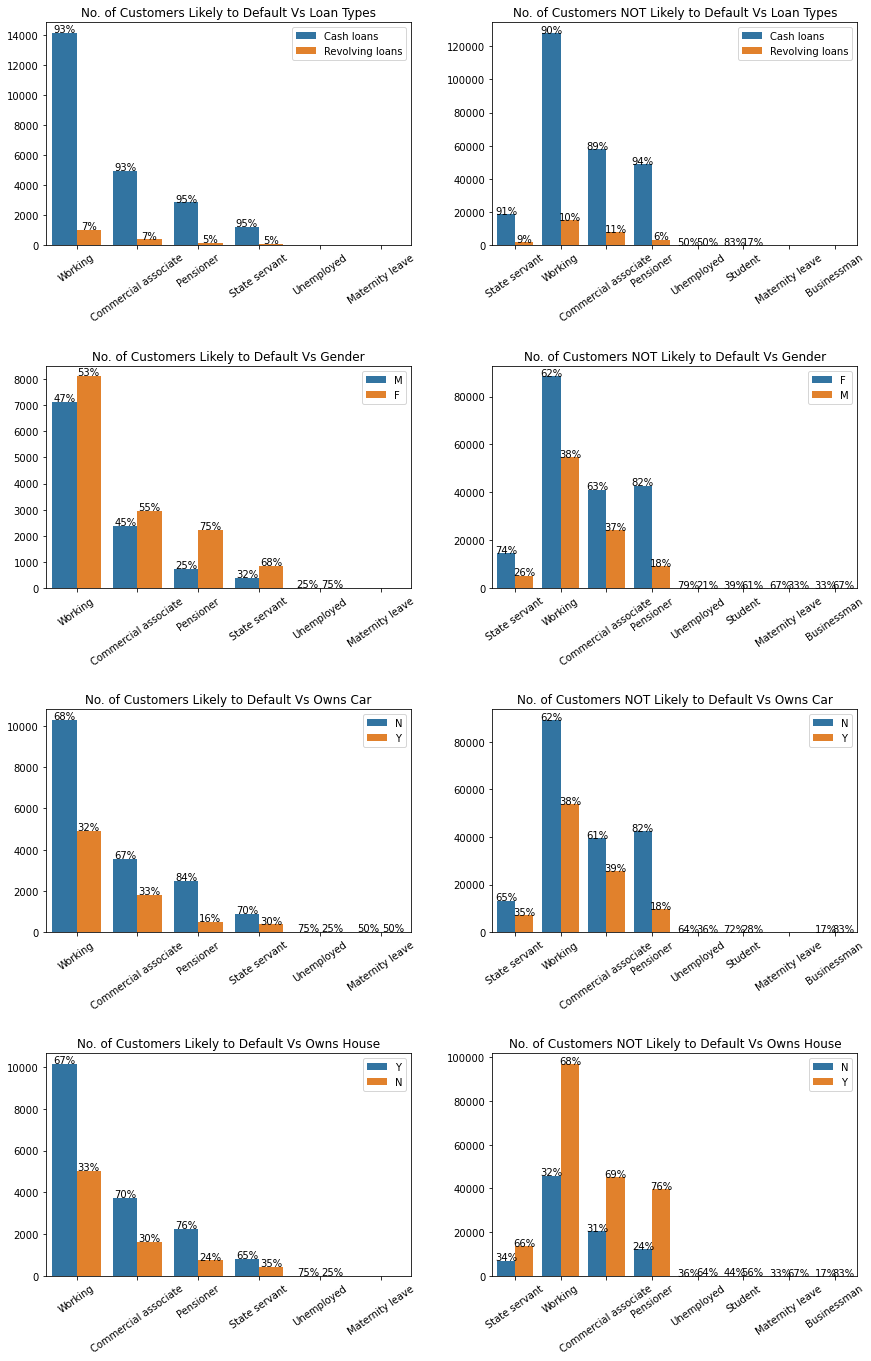

In [205]:
plot_target_categorical_vs_categorical('NAME_INCOME_TYPE')

### Inferences drawn from the plots for Income Type in various categories vs Target Variable:
- Compared with 'Loan Types', the distribution is almost similar, however in general the percentage of customer for who have Revolving Loans and NOT likely to default are greater than that of those who are likely to default.
- Compared with 'Gender', 'Working' and 'Pensioner' male are more likely to default than female.
- Compared whether 'Owns Car', the distribution is almost similar, except the 'Pentioner' who doesn't ownn car are NOT likely to default.
- Compared whether "Owns House',  the distribution is almost similar for both the customers who are likely to default and who are NOT likely to default in all categories.

### Distribution of Family Status in different categories like Loan Types, Gender, Owns Car, Owns House for Targer Variable

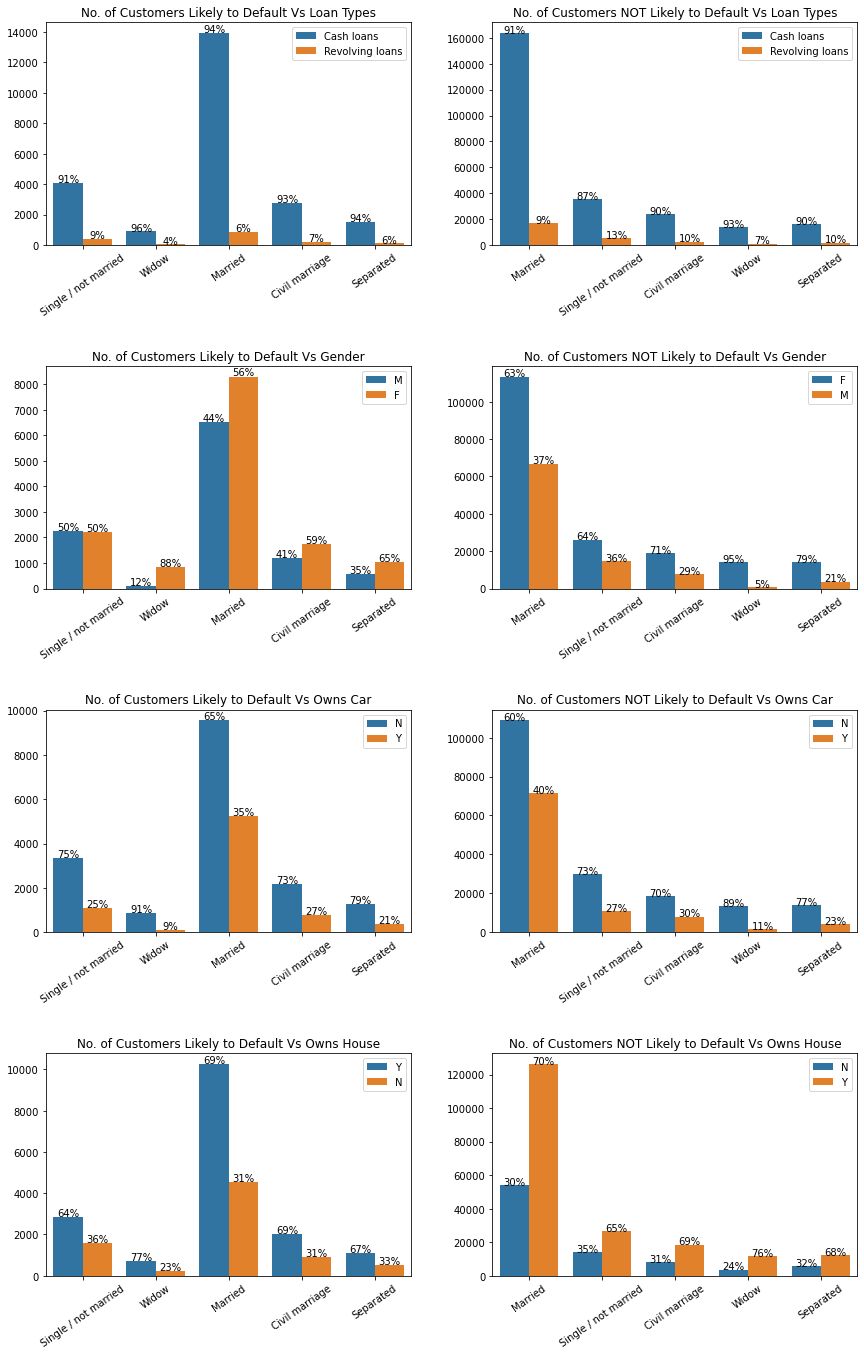

In [206]:
plot_target_categorical_vs_categorical('NAME_FAMILY_STATUS')

### Inferences drawn from the plots for Family Status in various categories vs Target Variable:
- Compared with 'Loan Types', the distribution is almost similar for both the customers who are likely to default and who are NOT likely to default in all categories. Those who have Cash Loans are more liekly to default.
- Compared with 'Gender', the distribution is almost similar, however 'Single' and 'Separated' females are more NOT likely to default than that of male. I(n general, Female percentage in each category for NOT likely to default is slightly more.)
- Compared whether 'Owns Car', the distribution is almost similar for both the customers who are likely to default and who are NOT likely to default in all categories.
- Compared whether 'Owns House', the distribution is almost similar, except the 'Married' who owns house are NOT likely to default.

### Distribution of Education Types in different categories like Loan Types, Gender, Owns Car, Owns House for Targer Variable

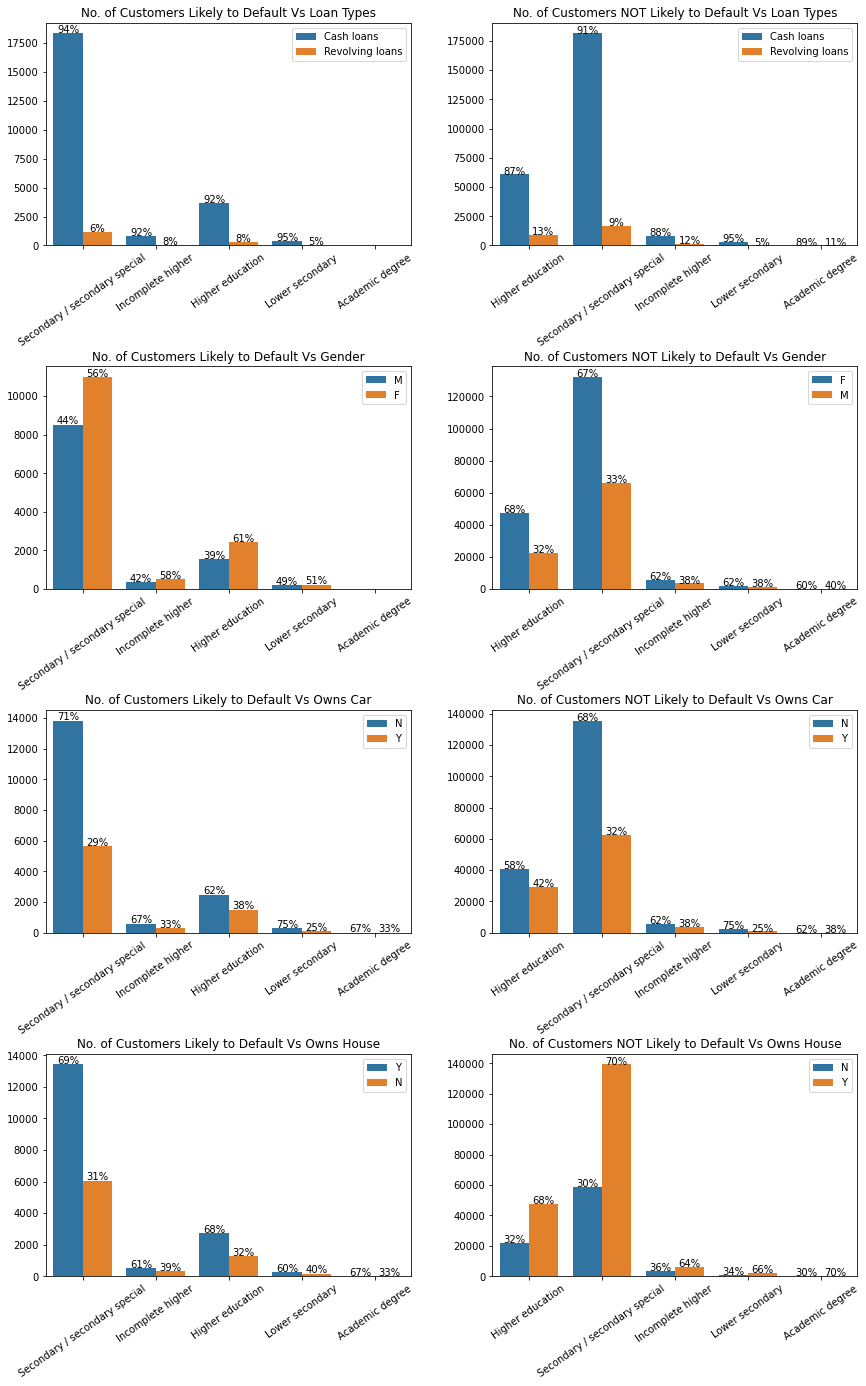

In [207]:
plot_target_categorical_vs_categorical('NAME_EDUCATION_TYPE')

### Inferences drawn from the plots for Education Types in various categories vs Target Variable:
- Compared with 'Loan Types', the distribution is almost similar for both the customers who are likely to default and who are NOT likely to default in all categories. In general, those who are having Cash Loans are more likely to default than those who are having Revoling Loans.
- Compared with 'Gender', similar pattern is observed however, lower secondary females are more likely to default compared to lower secondary males.
- Compared whether 'Owns Car', the distribution is almost similar for both the customers who are likely to default and who are NOT likely to default in all categories.
- Compared whether 'Owns House', the distribution is almost similar for both the customers who are likely to default and who are NOT likely to default in all categories.

### Distribution of NAME_HOUSING_TYPE in different categories like Loan Types, Gender, Owns Car, Owns House for Targer Variable

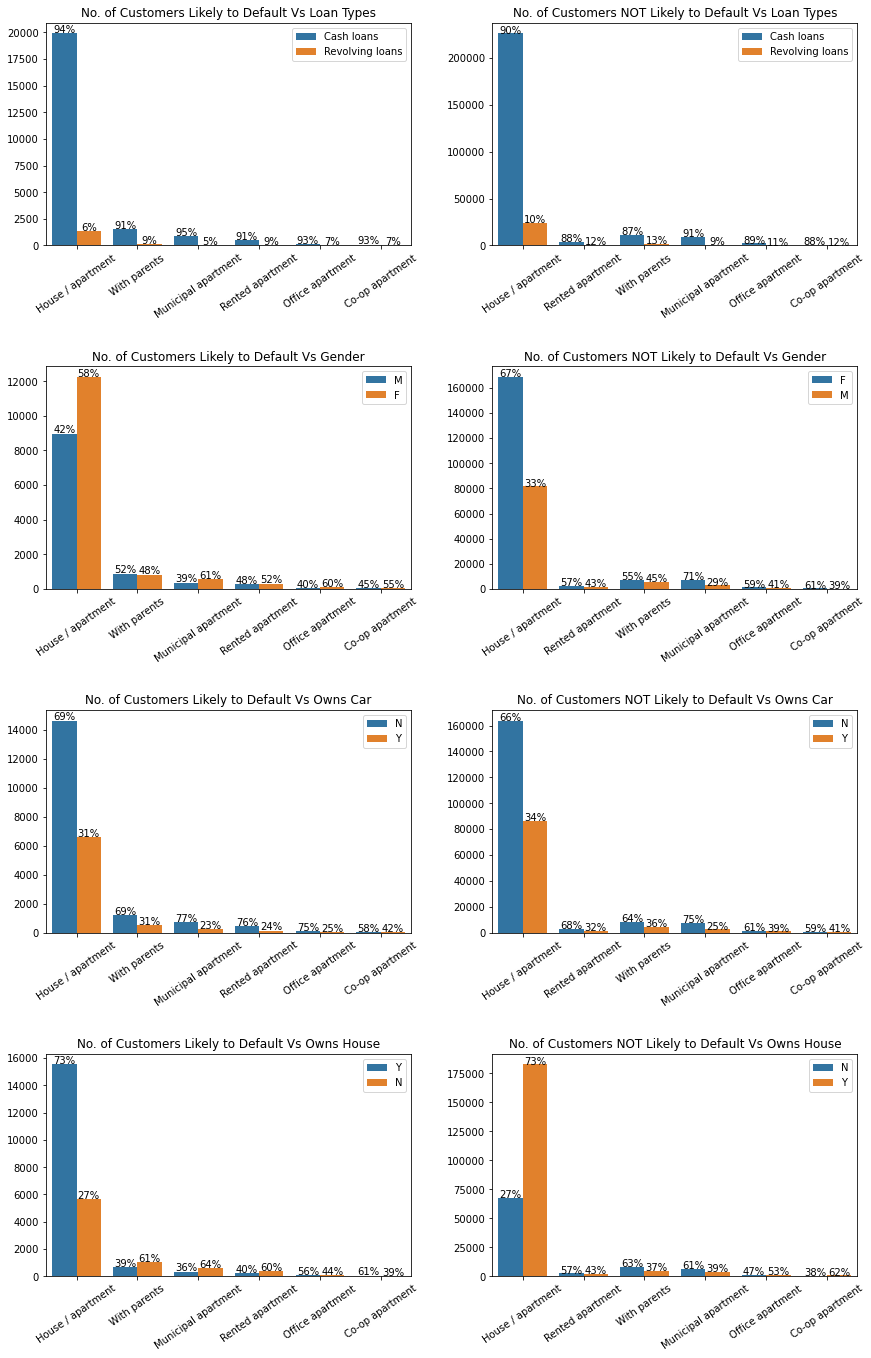

In [208]:
plot_target_categorical_vs_categorical('NAME_HOUSING_TYPE')

### Inferences drawn from the plots for Housing Types in various categories vs Target Variable:
- Compared with 'Loan Types', the distribution is almost similar for both the customers who are likely to default and who are NOT likely to default in all categories. In general, those who are having Cash Loans are more likely to default than those who are having Revoling Loans.
- Compared with 'Gender', similar pattern is observed however, in general Females who lives in House Apartment and Municiple Apartment are slightly LESS likely to default.
- Compared whether 'Owns Car', the distribution is almost similar but who owns car and lives in rented apartment are MORE likely to default.
- Compared whether 'Owns House', the distribution is almost similar for both the customers who are likely to default and who are NOT likely to default in all categories.

### Distribution of Family Member's Count in different categories like Loan Types, Gender, Owns Car, Owns House for Targer Variable

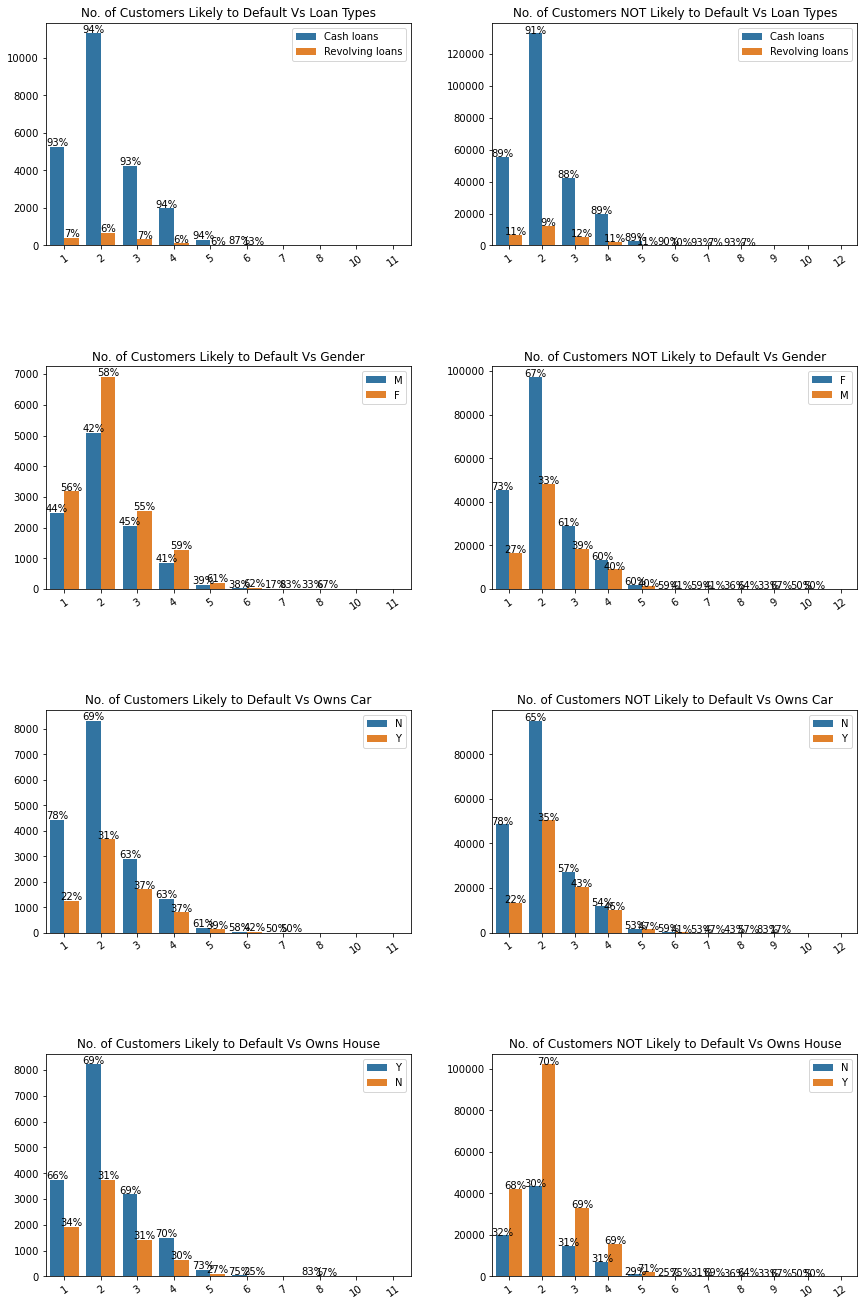

In [209]:
plot_target_categorical_vs_categorical('CNT_FAM_MEMBERS')

### Inferences drawn from the plots for Family Member's Count in various categories vs Target Variable:
- Compared with 'Loan Types', the distribution is almost similar for both the customers who are likely to default and who are NOT likely to default in all categories. In general, those who are having Cash Loans are MORE likely to default than those who are having Revoling Loans.
- Compared with 'Gender', similar pattern is observed however, in general Females are slightly LESS likely to default.
- Compared whether 'Owns Car', those where family count is more than 2 are slightly MORE likely to default.(In general)
- Compared whether 'Owns House', the distribution is almost similar for both the customers who are likely to default and who are NOT likely to default in all categories.

### Distribution of Children Count in different categories like Loan Types, Gender, Owns Car, Owns House for Targer Variable

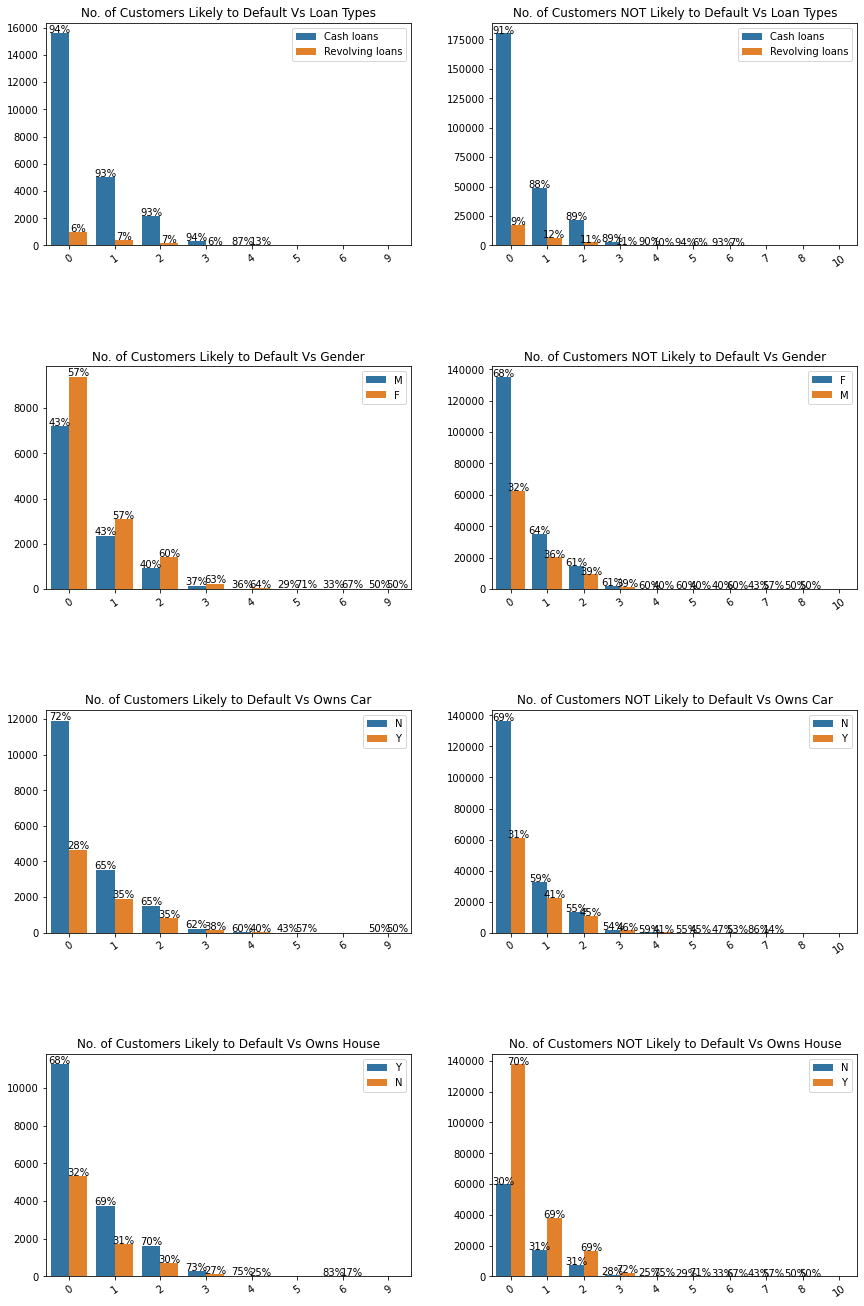

In [210]:
plot_target_categorical_vs_categorical('CNT_CHILDREN')

### Inferences drawn from the plots for Children's Count in various categories vs Target Variable:
- Compared with 'Loan Types', the distribution is almost similar for both the customers who are likely to default and who are NOT likely to default in all categories. In general, those who are having Cash Loans are MORE likely to default than those who are having Revoling Loans.
- Compared with 'Gender', similar pattern is observed however, in general Females are slightly LESS likely to default.
- Compared whether 'Owns Car', those who don't own car are slightly MORE likely to default.
- Compared whether 'Owns House', the distribution is almost similar for both the customers who are likely to default and who are NOT likely to default in all categories.

<Figure size 1440x1440 with 0 Axes>

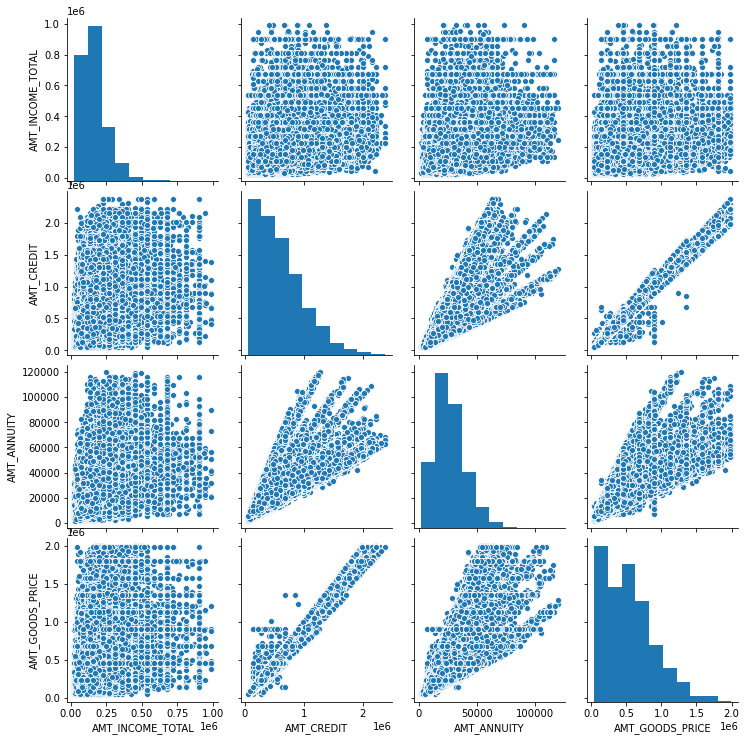

In [211]:
# Create a pair plot for Spread of Income, Credit, Annuity, Good's Price
plt.figure(figsize=[20,20])
sns.pairplot(application_data[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']])
plt.show()

<Figure size 576x576 with 0 Axes>

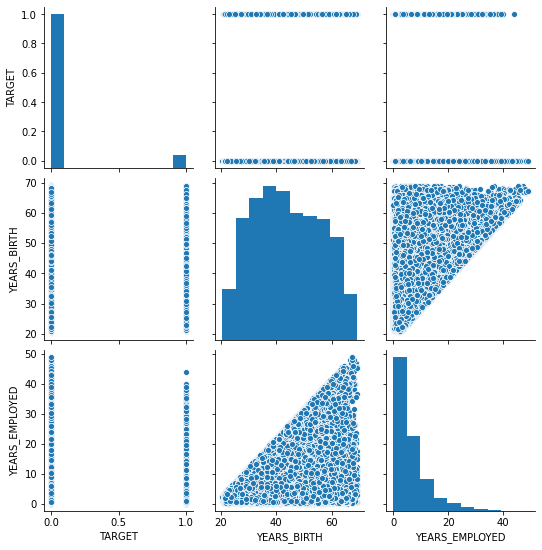

In [106]:
# Create a pair plot for Spread of Targe, Years_Birth, Years_Employed
plt.figure(figsize=[8,8])
sns.pairplot(application_data[['TARGET','YEARS_BIRTH','YEARS_EMPLOYED']])
plt.show()

## Multivariate Analysis
- In this, we will analyze different combination of factors that may affect the Target Variable.
- We will generate insights for multiple columns with the target column and check if any insights are there.

In [107]:
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  CNT_FAM_MEMBERS ORGANIZATION_TYPE  \
0  Single / not married  House / apartment                1   Business Entity   
1               Married  House / apartment                2            School   
2  Single / not married  House / apartment                1        Government   
3        Civil marriage  House / apartment                2   Business Entity   
4  Single / not married  House / apartment                1          Religion   

   YEARS_BIRTH  YEARS_EMPLOYED  
0    25.920548        1.745205  
1    45.931507        3.254795  
2    52.180822        0.616438  
3    52.068493        8.326027  
4    54.608219        8.323288

In [108]:
def plot_heat_maps(index, column, ax, title):
    pivot_table = pd.pivot_table(data=application_data,index=index,columns=column,values='TARGET')
    sns.heatmap(pivot_table,cmap="RdYlGn_r",vmin=0,vmax=1,annot=True,annot_kws={"size": 15},ax=ax)
    ax.set_title(title,fontsize=15)


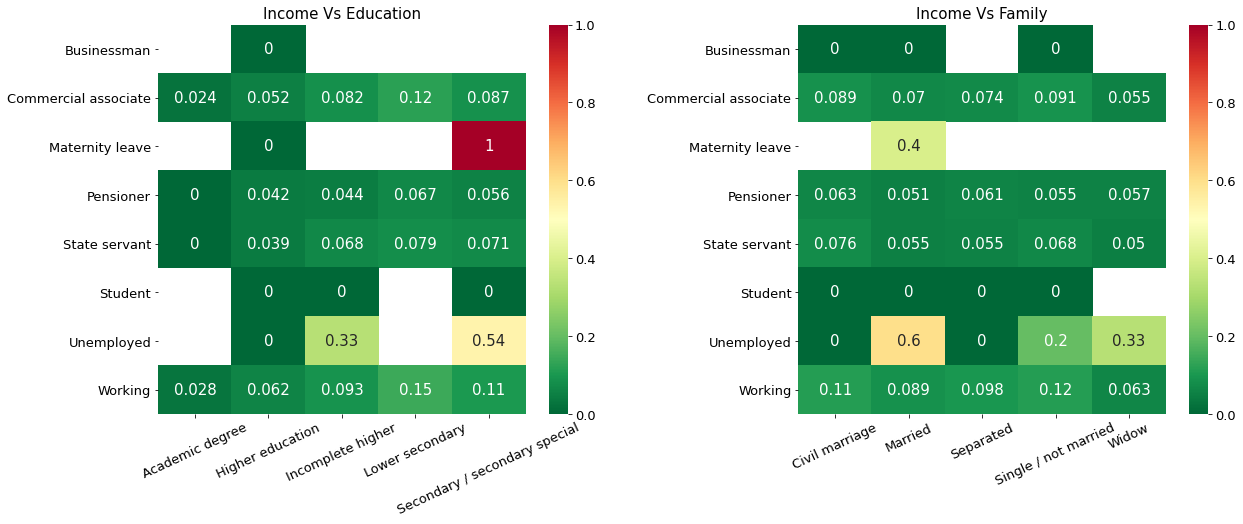

In [109]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
# Making a plot with 2 subplots

fig.tight_layout(h_pad=11,w_pad=15)

plot_heat_maps('NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', ax[0], 'Income Vs Education')
plot_heat_maps('NAME_INCOME_TYPE','NAME_FAMILY_STATUS',ax[1], 'Income Vs Family')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=25,fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel('')
    plt.ylabel('')
    
plt.show()

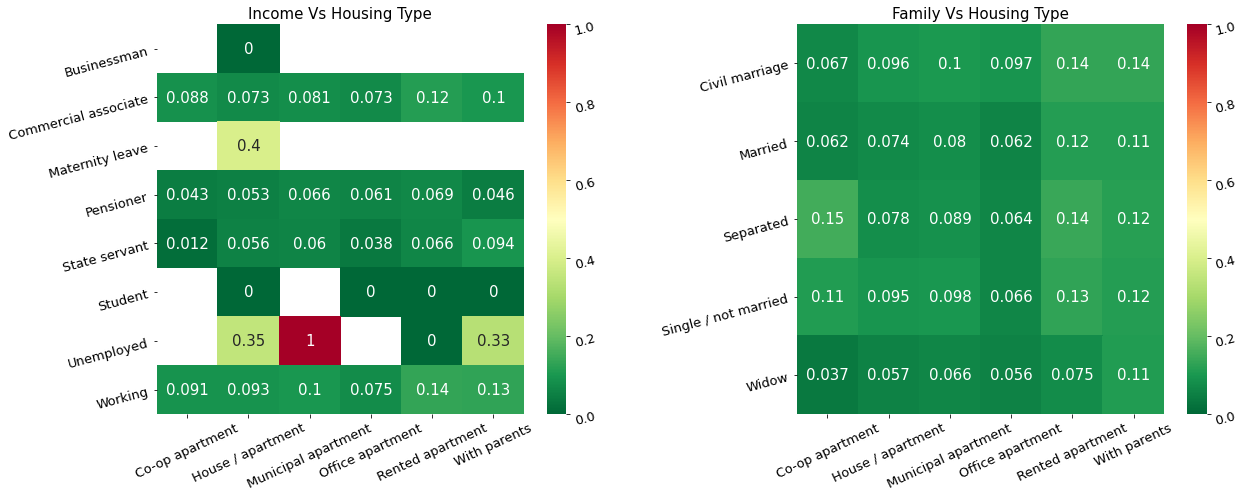

In [110]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))

fig.tight_layout(h_pad=11,w_pad=15)

plot_heat_maps('NAME_INCOME_TYPE','NAME_HOUSING_TYPE', ax[0], 'Income Vs Housing Type')
plot_heat_maps('NAME_FAMILY_STATUS','NAME_HOUSING_TYPE', ax[1], 'Family Vs Housing Type')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=25,fontsize=13)
    plt.yticks(fontsize=13,rotation=15)
    plt.xlabel('')
    plt.ylabel('')
    
plt.show()

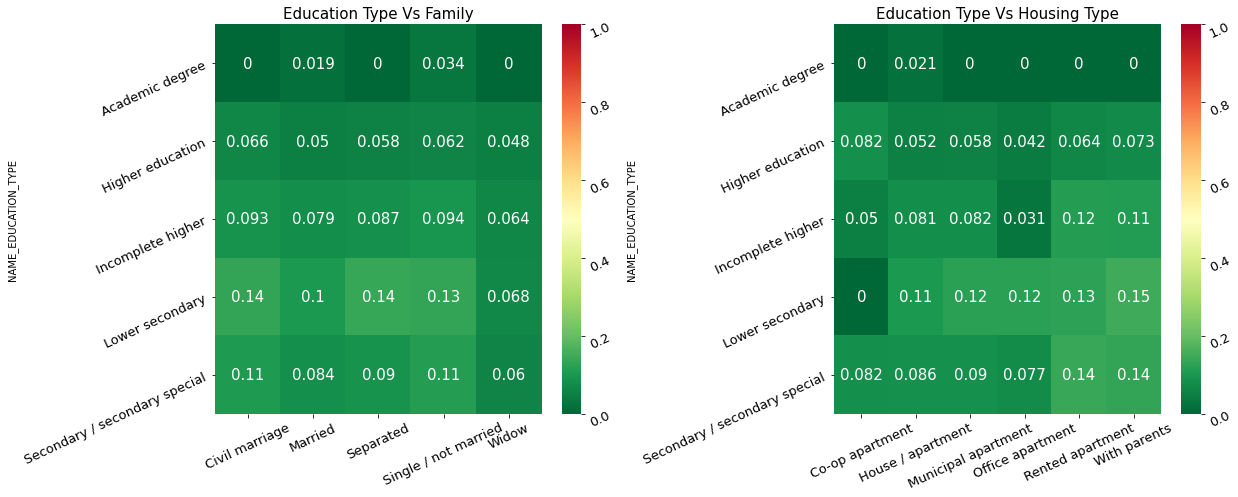

In [111]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))
# Making a plot with 2 subplots

fig.tight_layout(h_pad=15,w_pad=18)

plot_heat_maps('NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS', ax[0], 'Education Type Vs Family')
plot_heat_maps('NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE',ax[1], 'Education Type Vs Housing Type')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=25,fontsize=13)
    plt.yticks(fontsize=13,rotation=25)
    plt.xlabel('')
    plt.xlabel('')
plt.show()

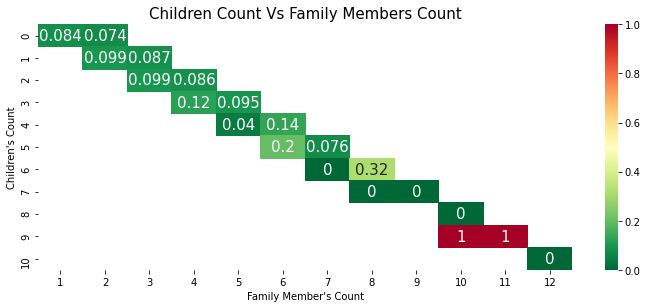

In [112]:
fig, ax = plt.subplots(1,1, figsize=(10,4))
# Making a plot with 2 subplots

fig.tight_layout(h_pad=15,w_pad=18)

plot_heat_maps('CNT_CHILDREN','CNT_FAM_MEMBERS', ax, 'Children Count Vs Family Members Count')
plt.xlabel('Family Member\'s Count') 
plt.ylabel('Children\'s Count')
plt.show()

In [113]:
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  CNT_FAM_MEMBERS ORGANIZATION_TYPE  \
0  Single / not married  House / apartment                1   Business Entity   
1               Married  House / apartment                2            School   
2  Single / not married  House / apartment                1        Government   
3        Civil marriage  House / apartment                2   Business Entity   
4  Single / not married  House / apartment                1          Religion   

   YEARS_BIRTH  YEARS_EMPLOYED  
0    25.920548        1.745205  
1    45.931507        3.254795  
2    52.180822        0.616438  
3    52.068493        8.326027  
4    54.608219        8.323288

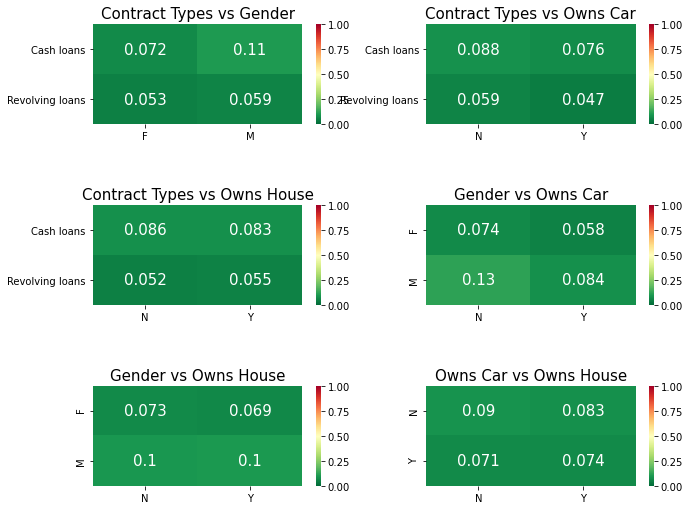

In [114]:
fig, ax = plt.subplots(3,2, figsize=(9,7))
# Making a plot with 2 subplots

fig.tight_layout(h_pad=6,w_pad=4)

plot_heat_maps('NAME_CONTRACT_TYPE','CODE_GENDER', ax[0][0], 'Contract Types vs Gender')
plot_heat_maps('NAME_CONTRACT_TYPE','FLAG_OWN_CAR', ax[0][1], 'Contract Types vs Owns Car')
plot_heat_maps('NAME_CONTRACT_TYPE','FLAG_OWN_REALTY', ax[1][0], 'Contract Types vs Owns House')
plot_heat_maps('CODE_GENDER','FLAG_OWN_CAR', ax[1][1], 'Gender vs Owns Car')
plot_heat_maps('CODE_GENDER','FLAG_OWN_REALTY', ax[2][0], 'Gender vs Owns House')
plot_heat_maps('FLAG_OWN_CAR','FLAG_OWN_REALTY', ax[2][1], 'Owns Car vs Owns House')

for ax in fig.axes:
    plt.sca(ax)
    plt.xlabel('')
    plt.ylabel('')
    
plt.show()

In [115]:
def plot_bar_plots_amount(x_axis):
    
    fig, ax = plt.subplots(2,2,figsize=(15,8))
    
    fig.tight_layout(h_pad=11,w_pad=5)

    sns.violinplot(x = x_axis, y = 'AMT_INCOME_TOTAL', data = application_data, hue ='TARGET', split = True, ax=ax[0][0])
    sns.violinplot(x = x_axis, y = 'AMT_CREDIT', data = application_data, hue ='TARGET', split = True, ax=ax[0][1])
    sns.barplot(x = x_axis, y = 'AMT_ANNUITY', data = application_data, hue ='TARGET', ax=ax[1][0])
    sns.barplot(x = x_axis, y = 'AMT_GOODS_PRICE', data = application_data, hue ='TARGET', ax=ax[1][1])
    
    
    ax[0][0].set_title("Violin plot for "+ x_axis + " vs AMT_INCOME_TOTAL"  + " for Target Column",fontsize=10)
    ax[0][1].set_title("Violin plot for "+ x_axis + " vs AMT_CREDIT" + " for Target Column",fontsize=10)
    ax[1][0].set_title("Bar plot for "+ x_axis + " vs AMT_ANNUITY" + " for Target Column",fontsize=10)
    ax[1][1].set_title("Bar plot for "+ x_axis + " vs AMT_GOODS_PRICE" + " for Target Column",fontsize=10)
    
    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=25)
        plt.legend(loc='upper right')
        plt.xlabel('')
        plt.ylabel('')

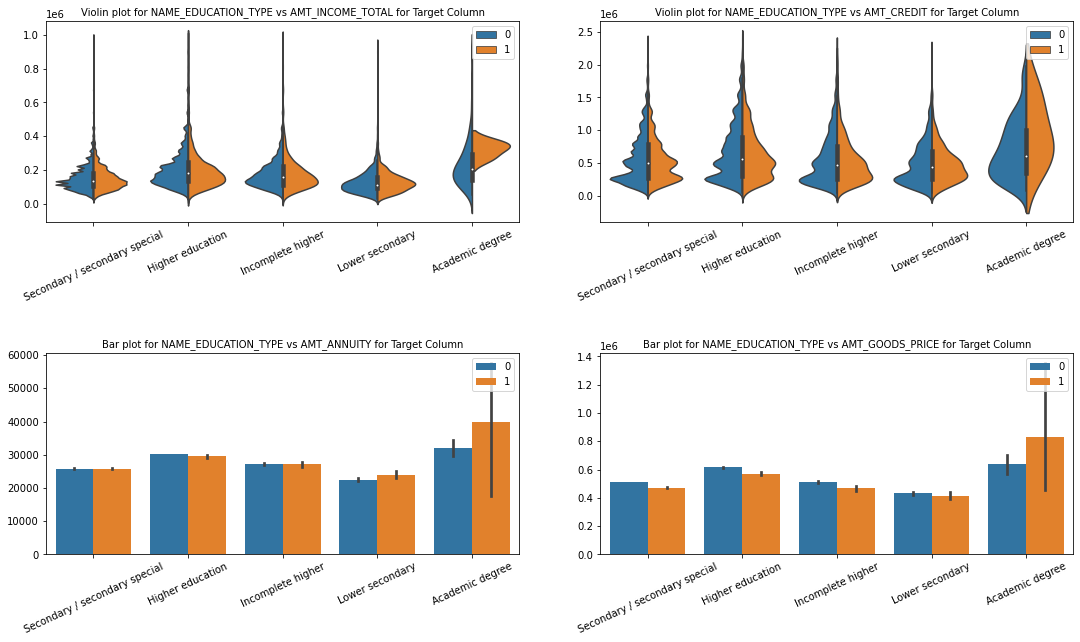

In [116]:
plot_bar_plots_amount('NAME_EDUCATION_TYPE')
plt.show()

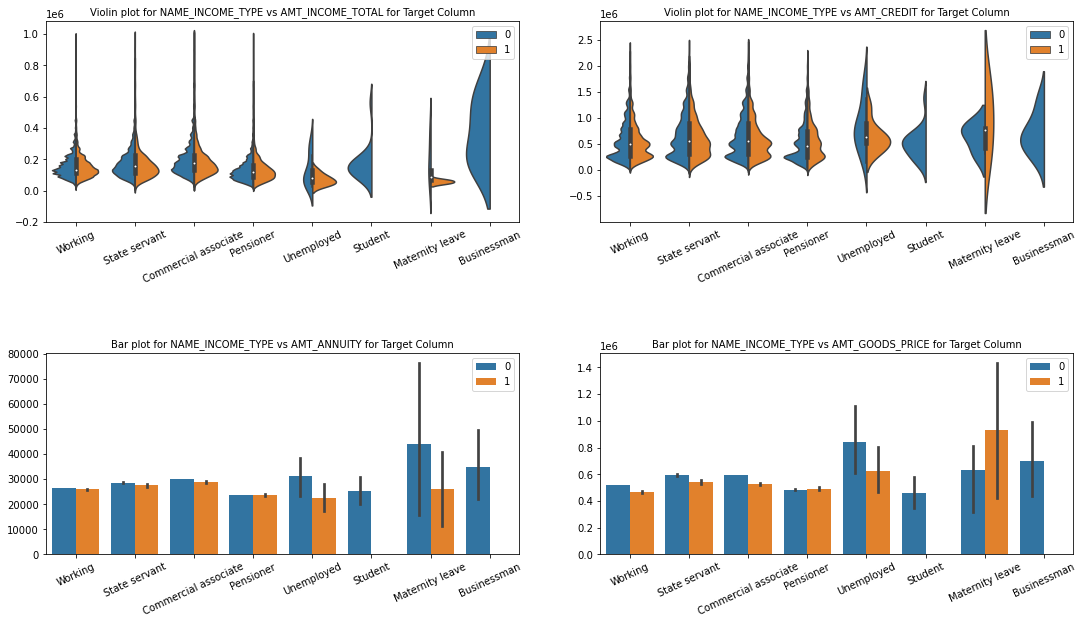

In [117]:
plot_bar_plots_amount('NAME_INCOME_TYPE')
plt.show()

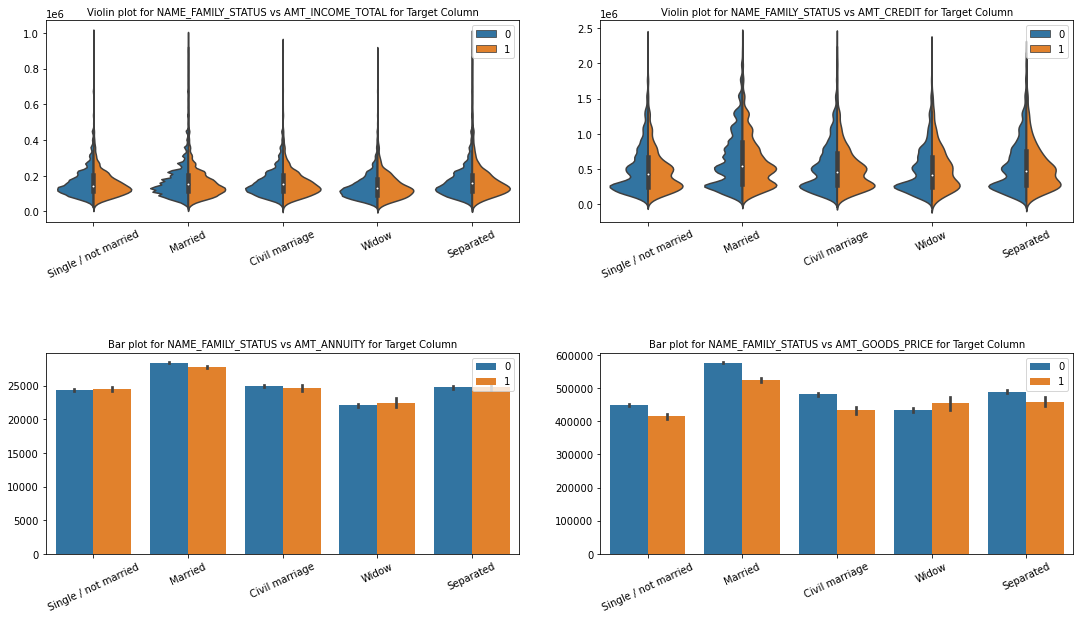

In [118]:
plot_bar_plots_amount('NAME_FAMILY_STATUS')
plt.show()

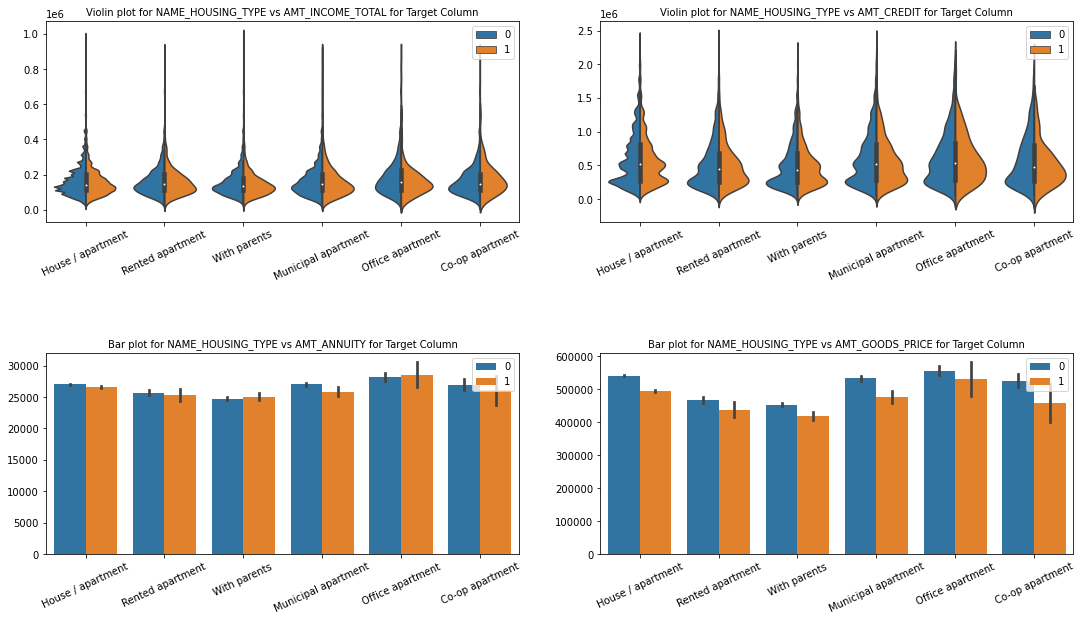

In [119]:
plot_bar_plots_amount('NAME_HOUSING_TYPE')
plt.show()

In [120]:
def plot_bar_plots_days(x_axis):
    
    fig, ax = plt.subplots(2,2,figsize=(15,8))
    
    fig.tight_layout(h_pad=11,w_pad=5)

    sns.barplot(x = x_axis, y = 'YEARS_BIRTH', data = application_data, hue ='TARGET', ax=ax[0][0])
    sns.violinplot(x = x_axis, y ='YEARS_BIRTH', data = application_data, hue ='TARGET', split = True, ax=ax[0][1])
    sns.barplot(x = x_axis, y = 'YEARS_EMPLOYED', data = application_data, hue ='TARGET', ax=ax[1][0])
    sns.violinplot(x = x_axis, y ='YEARS_EMPLOYED', data = application_data, hue ='TARGET', split = True, ax=ax[1][1])
    
    
    ax[0][0].set_title("Bar plot for "+ x_axis + " vs YEARS_BIRTH"  + " for Target Column", fontsize=10)
    ax[0][1].set_title("Violin plot for "+ x_axis + " vs YEARS_BIRTH" + " for Target Column", fontsize=10)
    ax[1][0].set_title("Bar plot for "+ x_axis + " vs YEARS_EMPLOYED" + " for Target Column", fontsize=10)
    ax[1][1].set_title("Violin plot for "+ x_axis + " vs YEARS_EMPLOYED" + " for Target Column", fontsize=10)
    
    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=25)
        plt.legend(loc='upper right')
        plt.xlabel('')
        plt.ylabel('')

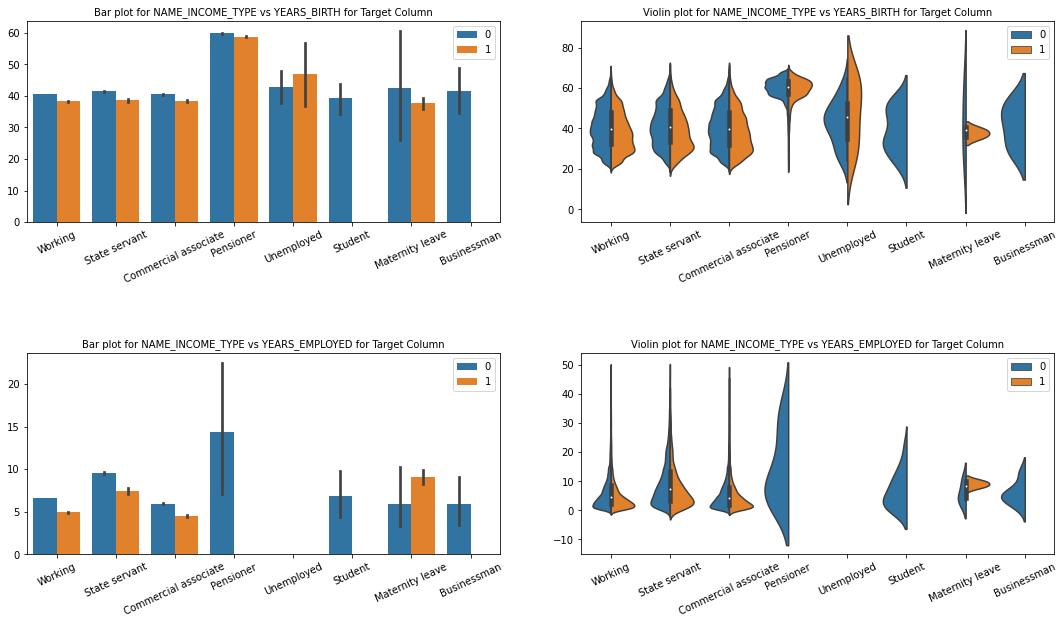

In [121]:
plot_bar_plots_days('NAME_INCOME_TYPE')
plt.show()

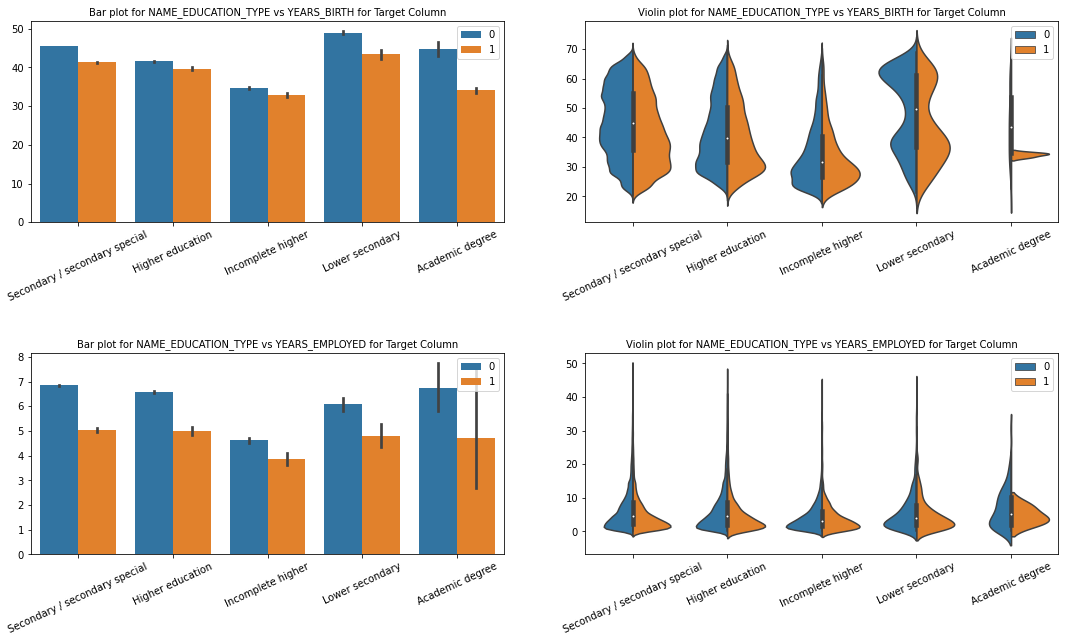

In [122]:
plot_bar_plots_days('NAME_EDUCATION_TYPE')
plt.show()

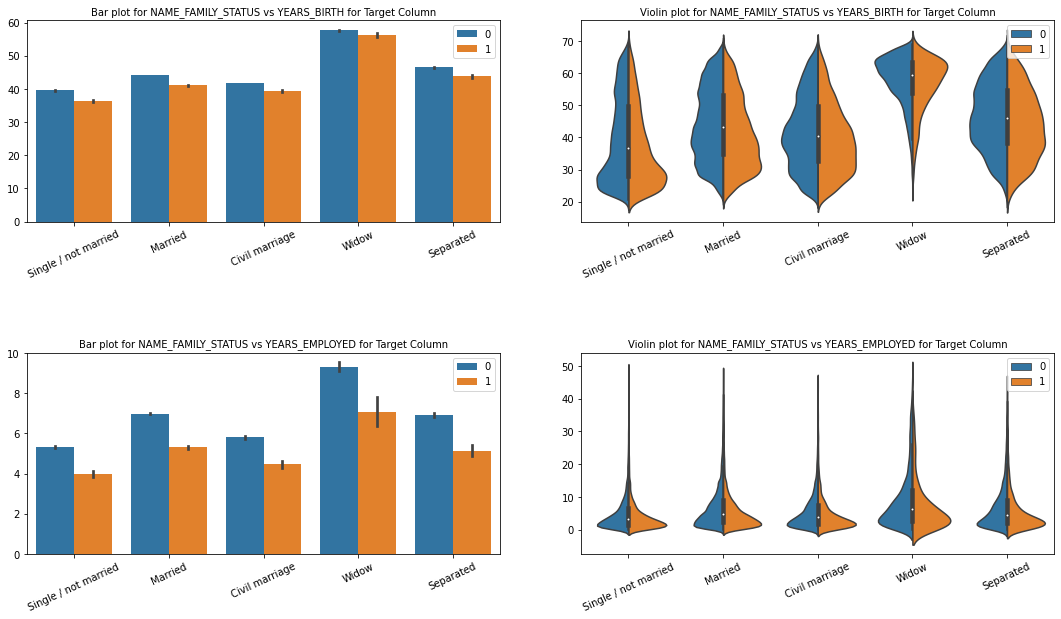

In [123]:
plot_bar_plots_days('NAME_FAMILY_STATUS')
plt.show()

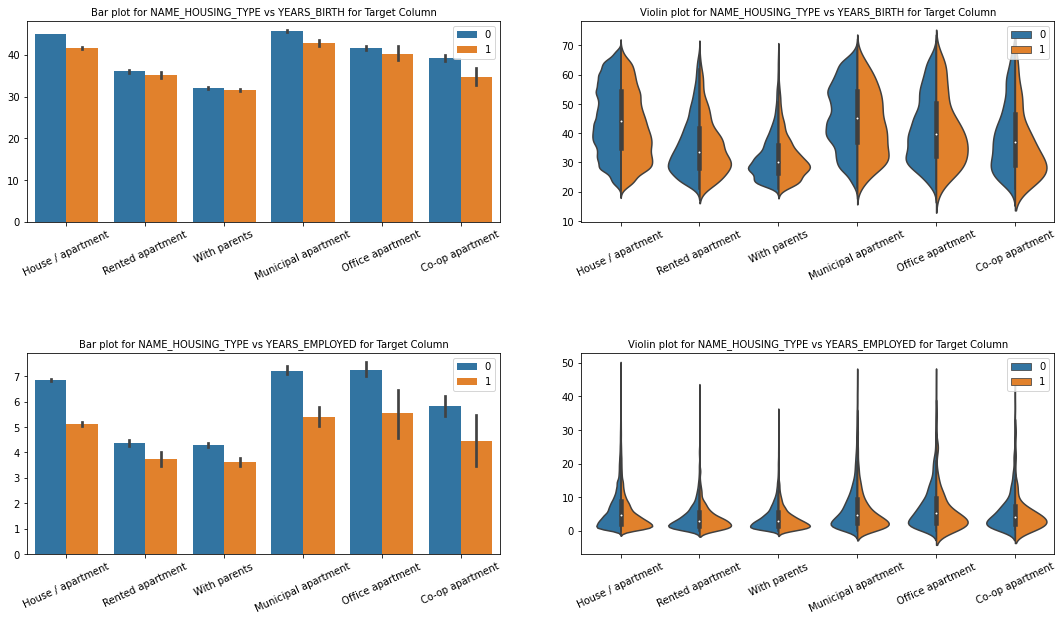

In [124]:
plot_bar_plots_days('NAME_HOUSING_TYPE')
plt.show()

In [125]:
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  CNT_FAM_MEMBERS ORGANIZATION_TYPE  \
0  Single / not married  House / apartment                1   Business Entity   
1               Married  House / apartment                2            School   
2  Single / not married  House / apartment                1        Government   
3        Civil marriage  House / apartment                2   Business Entity   
4  Single / not married  House / apartment                1          Religion   

   YEARS_BIRTH  YEARS_EMPLOYED  
0    25.920548        1.745205  
1    45.931507        3.254795  
2    52.180822        0.616438  
3    52.068493        8.326027  
4    54.608219        8.323288

In [126]:
application_data.AMT_GOODS_PRICE.quantile(0.80)

810000.0

In [127]:
# Let's bucket the total income of customers into 5 groups viz. '<99K','99K to 135K','135K to 162K','162K to 225K','>225K'

application_data['AMT_INCOME_RANGE'] = pd.qcut(application_data.AMT_INCOME_TOTAL,5,['<99K','99K to 135K','135K to 162K','162K to 225K','>225K'])


# Let's bucket the credit amount of customers into 5 groups viz. <0.1M, 0.1M to 0.6M, 0.6M to 1.1M, 1.1M to 1.6M, >1.6M

application_data['AMT_CREDIT_RANGE'] = pd.qcut(application_data.AMT_CREDIT,5,['<2.5L','2.5L to 4.27L','4.2L to 6L','6L to 9L','>9L'])


# Let's bucket the annuity amount of customers into 6 groups viz. <0, 0 to 20K, 20K to 40K, 40K to 60K, 60K to 80K, >80K

application_data['AMT_ANNUITY_RANGE'] = pd.qcut(application_data.AMT_ANNUITY,5,['<14K', '14K to 21K', '21K to 27K', '27K to 37K', '>37K'])


# Let's bucket the annuity amount of customers into 6 groups viz. <0.1M, 0.1M to 0.6M, 0.6M to 1.1M, 1.1M to 1.6M, >1.6M

application_data['AMT_GOODS_RANGE'] = pd.qcut(application_data.AMT_GOODS_PRICE,5,['<2.25L','2.25L to 3.73L','3.73L to 5.17L','5.17L to 8.1L','>8.1L'])

# Let's put the Flag values as 1's or 0's instead of Y or N for the calculational purpose

application_data.FLAG_OWN_CAR = application_data.FLAG_OWN_CAR.apply(lambda flag: 1 if flag=='Y' else 0)
application_data.FLAG_OWN_REALTY = application_data.FLAG_OWN_REALTY.apply(lambda flag: 1 if flag=='Y' else 0)

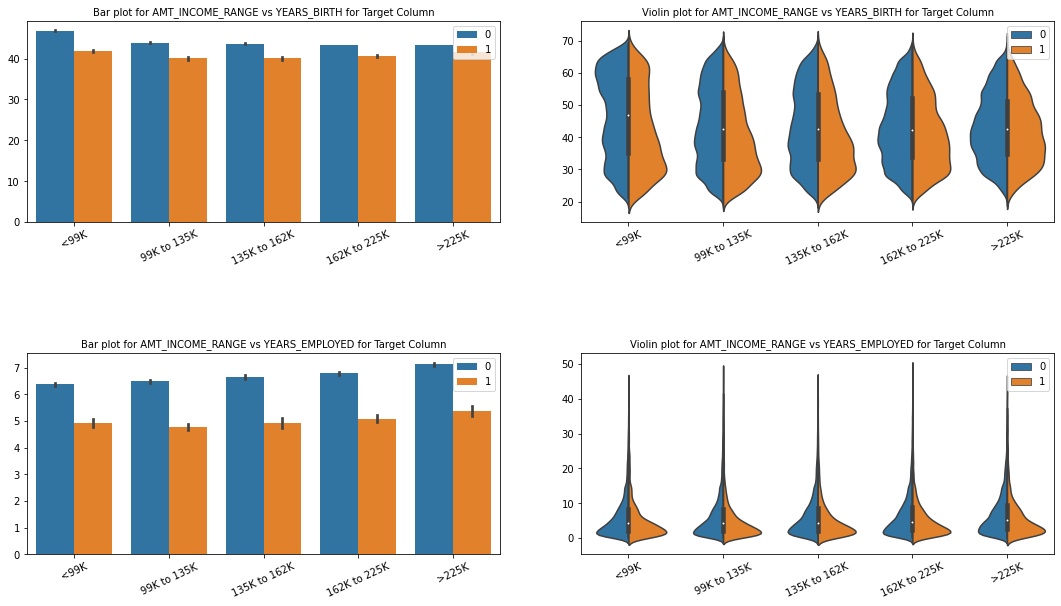

In [128]:
plot_bar_plots_days('AMT_INCOME_RANGE')
plt.show()

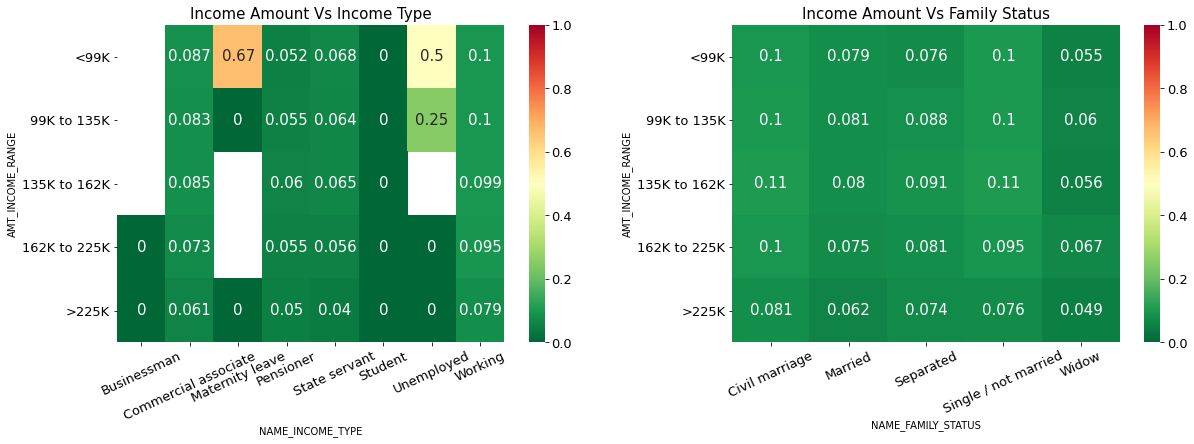

In [129]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))
# Making a plot with 2 subplots

fig.tight_layout(h_pad=11,w_pad=10)

plot_heat_maps('AMT_INCOME_RANGE','NAME_INCOME_TYPE', ax[0], 'Income Amount Vs Income Type')
plot_heat_maps('AMT_INCOME_RANGE','NAME_FAMILY_STATUS',ax[1], 'Income Amount Vs Family Status')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=25,fontsize=13)
    plt.yticks(fontsize=13)
    
plt.show()

In [130]:
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1         Cash loans           M             0   
1      100003       0         Cash loans           F             0   
2      100004       0    Revolving loans           M             1   
3      100006       0         Cash loans           F             0   
4      100007       0         Cash loans           M             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  CNT_FAM_MEMBERS ORGANIZATION_TYPE  \
0  Single / not married  House / apartment                1   Business Entity   
1               Married  House / apartment                2            School   
2  Single / not married  House / apartment                1        Government   
3        Civil marriage  House / apartment                2   Business Entity   
4  Single / not married  House / apartment                1          Religion   

   YEARS_BIRTH  YEARS_EMPLOYED AMT_INCOME_RANGE AMT_CREDIT_RANGE  \
0    25.920548        1.745205     162K to 225K    2.5L to 4.27L   
1    45.931507        3.254795            >225K              >9L   
2    52.180822        0.616438             <99K            <2.5L   
3    52.068493        8.326027      99K to 135K    2.5L to 4.27L   
4    54.608219        8.323288      99K to 135K       4.2L to 6L   

  AMT_ANNUITY_RANGE AMT_GOODS_RANGE  
0        21K to 27K  2.25L to 3.73L  
1        27K to 37K           >8.1L  
2              <14K          <2.25L  
3        27K to 37K  2.25L to 3.73L  
4        21K to 27K  3.73L to 5.17L